## Problem Statement
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

In this case study, develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

# Objective

If one is able to identify these `risky loan applicants`, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

# Table of Content
1. **[Import Libraries](#lib)**
2. **[Set Options](#opt)**
3. **[Read Data](#read)**
4. **[Understand Data](#understand)**
    - 4.1 - [Data Types](#dtype)
    - 4.2 - [Summary Statistics](#desc)
    - 4.3 - [Missing Values](#missing)
5. **[Data Cleaning](#preprocess)**
    - 5.1 - [Missing Values Treatment](#treat)
    - 5.2 - [Outlier Treatment](#outlier)
    - 5.3 - [Encode Categorical Variables](#encode)
6. **[Exploratory Data Analysis](#eda)**
    - 6.1 - [Univariate Categorical Analysis](#uni_cat)
    - 6.2 - [Univariate Continuous Analysis](#uni_cont)
    - 6.3 - [Segmented Univariate Analysis](#seg_uni)
    - 6.4 - [Bivariate Categorical Analysis](#bi_cat)
    - 6.5 - [Bivariate Continuous Analysis](#bi_cont)
    - 6.6 - [Multivariate Analysis](#multi)
7. **[Conclusions](#conclusions)**

# Import Libraries

In [72]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set Options

In [73]:
# Suppress all warnings
warnings.filterwarnings("ignore")

pd.set_option("display.min_rows",500)
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)

# Set the default style
custom_palette = ['orange', 'purple']
palette = sns.color_palette(custom_palette)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)

# Read Data

In [74]:

loan_df = pd.read_csv(r"loan.csv")  #Add path for file loan.csv
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Data Types

In [75]:
loan_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [76]:
loan_df.shape

(39717, 111)

In [77]:
# Common Functions

iqr_constant = 1.5

def check_null_percentage(df):
    d = df.isnull().sum()/(len(loan_df))*100
    return d.sort_values(ascending=False)

def check_duplicates(df,col):
  unique_len = len(df[col].unique())
  len_df = len(df)
  if unique_len == len_df:
    print('No Duplicate Values Exists!')
  else:
    print('Noumber of Duplicate Values : ', len_df - unique_len)
    print('Duplicate Values Exists')


def quantiles_info(df,col):
    print(f'25th Percentile:  {df[col].quantile(0.25)}')
    print(f'50th Percentile:  {df[col].quantile(0.50)}')
    print(f'75th Percentile:  {df[col].quantile(0.75)}')


def get_outliers_using_iqr(df,col,q):

  q1 = df[col].quantile(q)
  q3 = df[col].quantile(1-q)

  iqr = q3-q1

  lower_bound = q1 - iqr*iqr_constant
  upper_bound = q3 + iqr*iqr_constant

  return lower_bound, upper_bound



def comparison_btw_before_after_remove_outliers(df,col):

    lower, upper = get_outliers_using_iqr(df,col,0.25)
    after_removing_outliers = df[(df[col] > lower) & (df[col] < upper) ]

    print('Drop Percentage after removing outliers : ', ((len(df[col]) - len(after_removing_outliers[col]))/len(df[col])*100 ))

    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.boxplot(data=df,x=col,ax=p[0],color='orange')
    sns.boxplot(data=after_removing_outliers,x=col,ax=p[1], color='purple')
    plt.tight_layout()
    plt.show()


def remove_outliers(df,col):

    lower, upper = get_outliers_using_iqr(df,col,0.25)
    after_removing_outliers = df[(df[col] > lower) & (df[col] < upper) ]

    return after_removing_outliers

def univariate_graph_cat_analysis(df,col,xticks_rot=False):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    percentage_analysis =df[col].value_counts()/len(df)*100
    sns.histplot(data= df[col], ax=p[0],color='orange')
    sns.barplot(data= percentage_analysis, ax=p[1],color='purple')
    p[0].set_ylabel('Count')
    p[1].set_ylabel('Percentage')
    # Annotation
    for i in range(len(percentage_analysis)):
        p[1].text(i, percentage_analysis[i], round(percentage_analysis[i],2), ha = 'center', va = 'bottom')
    if xticks_rot :
      p[0].tick_params(axis='x', rotation=90)
      p[1].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    return fig,p

def univariate_graph_cont_analysis(df,col):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.histplot(data= df[col], kde=True, ax=p[0], color='orange')
    sns.boxplot(x=col, data=df, ax=p[1], color='purple')
    plt.tight_layout()
    return fig,p





## Summary Statistics

In [78]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Missing Values

In [79]:

null_percent = check_null_percentage(loan_df)
null_percent

num_il_tl                         100.000000
num_bc_sats                       100.000000
num_bc_tl                         100.000000
num_actv_bc_tl                    100.000000
num_accts_ever_120_pd             100.000000
mths_since_recent_revol_delinq    100.000000
num_actv_rev_tl                   100.000000
mths_since_recent_inq             100.000000
num_tl_90g_dpd_24m                100.000000
num_tl_30dpd                      100.000000
num_tl_120dpd_2m                  100.000000
num_sats                          100.000000
num_rev_tl_bal_gt_0               100.000000
num_rev_accts                     100.000000
pct_tl_nvr_dlq                    100.000000
mo_sin_old_il_acct                100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_rcnt_rev_tl_op             100.000000
mo_sin_rcnt_tl                    100.000000
mths_since_recent_bc              100.000000
mort_acc                          100.000000
mths_since_recent_bc_dlq          100.000000
bc_util   

# Data Cleaning

## Fixing Missing Values

In [80]:

null_percent[(null_percent.values < 64)].index

Index(['desc', 'emp_title', 'emp_length', 'pub_rec_bankruptcies',
       'last_pymnt_d', 'chargeoff_within_12_mths',
       'collections_12_mths_ex_med', 'revol_util', 'tax_liens', 'title',
       'last_credit_pull_d', 'total_rec_prncp', 'total_pymnt_inv',
       'total_rec_int', 'last_pymnt_amnt', 'collection_recovery_fee',
       'recoveries', 'total_rec_late_fee', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_amnt', 'member_id',
       'funded_amnt_inv', 'funded_amnt', 'id', 'int_rate', 'term',
       'total_pymnt', 'total_acc', 'out_prncp_inv', 'out_prncp',
       'initial_list_status', 'pub_rec', 'revol_bal', 'inq_last_6mths',
       'open_acc', 'loan_status', 'issue_d', 'delinq_2yrs', 'earliest_cr_line',
       'dti', 'addr_state', 'purpose', 'zip_code', 'pymnt_plan', 'url',
       'grade', 'installment', 'policy_code', 'application_type',
       'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

In [81]:
# Removed Columns which have more than 64 % Missing Values
loan_df = loan_df.loc[:,null_percent[(null_percent.values < 64)].index ]

In [82]:
# Removed Description Column also which 32% Missing Values and cannot be imputated.
loan_df.drop('desc', inplace=True,axis=1)

In [83]:
check_null_percentage(loan_df)

emp_title                     6.191303
emp_length                    2.706650
pub_rec_bankruptcies          1.754916
last_pymnt_d                  0.178765
chargeoff_within_12_mths      0.140998
collections_12_mths_ex_med    0.140998
revol_util                    0.125891
tax_liens                     0.098195
title                         0.027696
last_credit_pull_d            0.005036
total_rec_prncp               0.000000
total_pymnt_inv               0.000000
total_rec_int                 0.000000
last_pymnt_amnt               0.000000
collection_recovery_fee       0.000000
recoveries                    0.000000
total_rec_late_fee            0.000000
sub_grade                     0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
loan_amnt                     0.000000
member_id                     0.000000
funded_amnt_inv               0.000000
funded_amnt                   0.000000
id                       

In [84]:
# Imputated Missing Values With Median
loan_df['pub_rec_bankruptcies'] = loan_df['pub_rec_bankruptcies'].median()

In [85]:
# Remove all rows with Null values
loan_df1 = loan_df.dropna()

# Checking Again for Null Values
check_null_percentage(loan_df1)

emp_title                     0.0
emp_length                    0.0
pub_rec_bankruptcies          0.0
last_pymnt_d                  0.0
chargeoff_within_12_mths      0.0
collections_12_mths_ex_med    0.0
revol_util                    0.0
tax_liens                     0.0
title                         0.0
last_credit_pull_d            0.0
total_rec_prncp               0.0
total_pymnt_inv               0.0
total_rec_int                 0.0
last_pymnt_amnt               0.0
collection_recovery_fee       0.0
recoveries                    0.0
total_rec_late_fee            0.0
sub_grade                     0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
loan_amnt                     0.0
member_id                     0.0
funded_amnt_inv               0.0
funded_amnt                   0.0
id                            0.0
int_rate                      0.0
term                          0.0
total_pymnt                   0.0
total_acc     

In [86]:
loan_df1.shape

(37040, 53)

In [87]:
# Loan Applicant Id's are Unique in dataset
check_duplicates(loan_df1,'id')

No Duplicate Values Exists!


In [88]:
# Member Id's are also Unique
check_duplicates(loan_df1,'member_id')

No Duplicate Values Exists!


## Standardising Values

In [89]:
# Here we can see there are many columns which can be transformed into Continuous(Numerical) or DataTime Data which will more relevant

#### Fixing Continuous Values by removing extra string

In [90]:
# Removing Months from Values
loan_df1.loc[:,'term'] = loan_df1.loc[:,'term'].apply(lambda x : int(x.split(' ')[1]))

# Removing % Symbol from Values
loan_df1.loc[:,'int_rate'] = loan_df1.loc[:,'int_rate'].apply(lambda x: float(x.split('%')[0]))
loan_df1.loc[:,'revol_util'] = loan_df1.loc[:,'revol_util'].apply(lambda x: float(x.split('%')[0]))

#### Converting into proper datetime

In [91]:
# Converting all Month-Year into proper Time format
loan_df1.loc[:,'issue_d'] = loan_df1.loc[:,'issue_d'].apply(lambda x: pd.to_datetime(f'01-{x}'))
loan_df1.loc[:,'earliest_cr_line'] = loan_df1.loc[:,'earliest_cr_line'].apply(lambda x: pd.to_datetime(f'01-{x}'))
loan_df1.loc[:,'last_credit_pull_d'] = loan_df1.loc[:,'last_credit_pull_d'].apply(lambda x: pd.to_datetime(f'01-{x}'))
loan_df1.loc[:,'last_pymnt_d'] = loan_df1.loc[:,'last_pymnt_d'].apply(lambda x: pd.to_datetime(f'01-{x}'))

#### Converting into proper datatypes

In [92]:
# Converting Object to Numerical Data
loan_df1['term'] = loan_df1['term'].astype('int')
loan_df1['int_rate'] = loan_df1['int_rate'].astype('float')
loan_df1['revol_util'] = loan_df1['revol_util'].astype('float')

####  Checking and Removing Outliers

Drop Percentage after removing outliers :  3.08585313174946


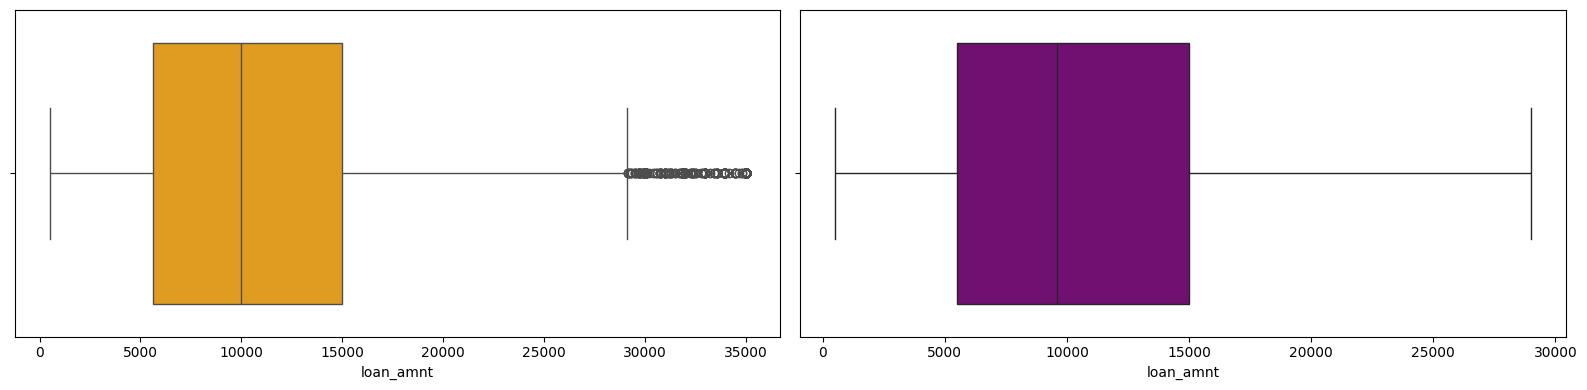

In [93]:
get_outliers_using_iqr(loan_df1,'loan_amnt',0.25)
comparison_btw_before_after_remove_outliers(loan_df1,'loan_amnt')

In [94]:
# Removing Outliers
loan_df1 = remove_outliers(loan_df1,'loan_amnt')

quantiles_info(loan_df1, 'loan_amnt')

25th Percentile:  5500.0
50th Percentile:  9600.0
75th Percentile:  15000.0


Observations:
 * After removing outliers, the distribution of `loan_amnt` is more uniform.
 * The 25th Percentile of `loan_amnt` is 5500 and 75th Percentile is 15000. So, most of the loans are between 5500 and 15000.
 * 50th Percentile of `loan_amnt` is 9600. So, the median loan amount is 9600.

Drop Percentage after removing outliers :  0.16157339053402792


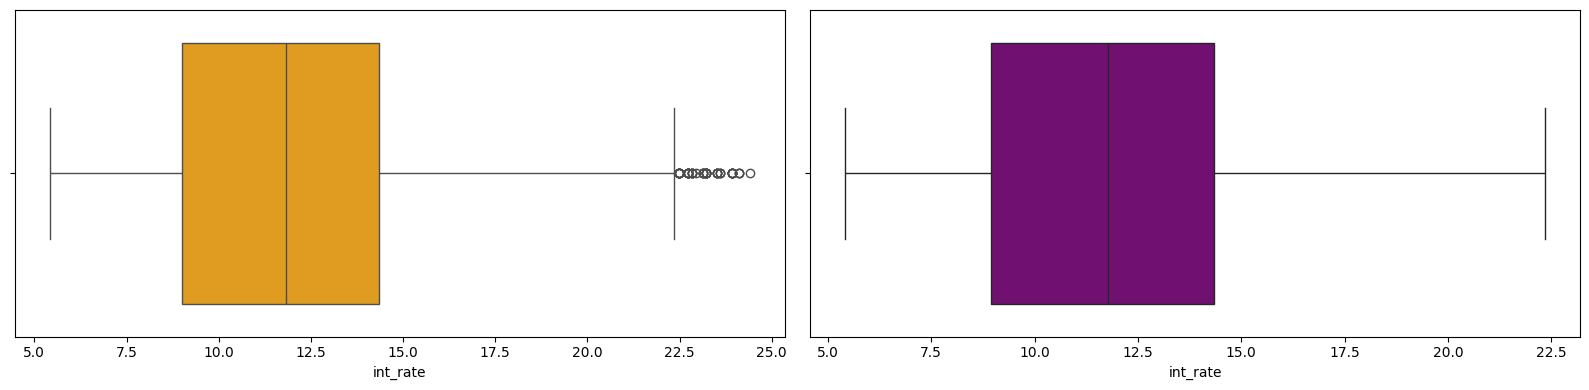

In [95]:
get_outliers_using_iqr(loan_df1,'int_rate',0.25)
comparison_btw_before_after_remove_outliers(loan_df1,'int_rate')

In [96]:
# Removing Outliers
loan_df1 = remove_outliers(loan_df1,'int_rate')

quantiles_info(loan_df1, 'int_rate')

25th Percentile:  8.94
50th Percentile:  11.78
75th Percentile:  14.35


Observations:
* After removing outliers, the distribution of `int_rate` is more uniform.
* The 25th Percentile of `int_rate` is 8.94 and 75th Percentile is 14.35 . So, most of the interest rates are between 8.94 and 14.35 .
* 50th Percentile of `int_rate` is 11.78. So, the median interest rate is 11.78.

In [97]:
# Removing unnecessary category which doesn't helping in analysis
loan_df1 = loan_df1[(loan_df1['home_ownership'] != 'NONE') & (loan_df1['home_ownership'] != 'OTHER')]
loan_df1 = loan_df1[loan_df1['loan_status'] != 'Current']

List of Categorical Columns

In [98]:
loan_df1.select_dtypes('object').columns

Index(['emp_title', 'emp_length', 'last_pymnt_d', 'title',
       'last_credit_pull_d', 'sub_grade', 'home_ownership',
       'verification_status', 'initial_list_status', 'loan_status', 'issue_d',
       'earliest_cr_line', 'addr_state', 'purpose', 'zip_code', 'pymnt_plan',
       'url', 'grade', 'application_type'],
      dtype='object')

List of Continuous Columns

In [99]:
list(loan_df1.select_dtypes(exclude='object').columns)

['pub_rec_bankruptcies',
 'chargeoff_within_12_mths',
 'collections_12_mths_ex_med',
 'revol_util',
 'tax_liens',
 'total_rec_prncp',
 'total_pymnt_inv',
 'total_rec_int',
 'last_pymnt_amnt',
 'collection_recovery_fee',
 'recoveries',
 'total_rec_late_fee',
 'annual_inc',
 'loan_amnt',
 'member_id',
 'funded_amnt_inv',
 'funded_amnt',
 'id',
 'int_rate',
 'term',
 'total_pymnt',
 'total_acc',
 'out_prncp_inv',
 'out_prncp',
 'pub_rec',
 'revol_bal',
 'inq_last_6mths',
 'open_acc',
 'delinq_2yrs',
 'dti',
 'installment',
 'policy_code',
 'acc_now_delinq',
 'delinq_amnt']

## Conclusion from Data Cleaning

1. **Missing Values**:
    - Columns with more than 64% missing values were removed.
    - The 'desc' column was also removed due to 32% missing values and inability to impute.
    - The 'pub_rec_bankruptcies' column was imputed with the median value.
    - Remaining rows with null values were dropped.

2. **Duplicates**:
    - No duplicate values were found in 'id' and 'member_id' columns.

3. **Standardizing Values**:
    - The 'term' column was converted to numerical by removing the 'months' string.
    - The 'int_rate' and 'revol_util' columns were converted to numerical by removing the '%' symbol.
    - Date columns ('issue_d', 'earliest_cr_line', 'last_credit_pull_d', 'last_pymnt_d') were converted to proper datetime format.
    - The 'term', 'int_rate', and 'revol_util' columns were converted to appropriate numerical data types.

4. **Outliers**:
    - Outliers were identified and removed using the IQR method for 'loan_amnt' and 'int_rate' columns.
    - The distribution of these columns became more uniform after removing outliers.

5. **Categorical Columns**:
    - Unnecessary categories in 'home_ownership' and 'loan_status' columns were removed.

6. **Continuous Columns**:
    - Continuous columns were identified and listed for further analysis.

Overall, the data cleaning process ensured that the dataset is free from missing values, duplicates, and outliers, and that all columns are in appropriate formats for analysis.

# Univariate Categorical Analysis


In [100]:

loan_df1.head()

,emp_title,emp_length,pub_rec_bankruptcies,last_pymnt_d,chargeoff_within_12_mths,collections_12_mths_ex_med,revol_util,tax_liens,title,last_credit_pull_d,total_rec_prncp,total_pymnt_inv,total_rec_int,last_pymnt_amnt,collection_recovery_fee,recoveries,total_rec_late_fee,sub_grade,home_ownership,annual_inc,verification_status,loan_amnt,member_id,funded_amnt_inv,funded_amnt,id,int_rate,term,total_pymnt,total_acc,out_prncp_inv,out_prncp,initial_list_status,pub_rec,revol_bal,inq_last_6mths,open_acc,loan_status,issue_d,delinq_2yrs,earliest_cr_line,dti,addr_state,purpose,zip_code,pymnt_plan,url,grade,installment,policy_code,application_type,acc_now_delinq,delinq_amnt
1,Ryder,< 1 year,0.0,2013-04-01 00:00:00,0.0,0.0,9.4,0.0,bike,2013-09-01 00:00:00,456.46,1008.71,435.17,119.66,1.11,117.08,0.00,C4,RENT,30000.0,Source Verified,2500,1314167,2500.0,2500,1077430,15.27,60,1008.710000,4,0.0,0.0,f,0,1687,5,3,Charged Off,2011-12-01 00:00:00,0,1999-04-01 00:00:00,1.00,GA,car,309xx,n,https://lendingclub.com/browse/loanDetail.acti...,C,59.83,1,INDIVIDUAL,0,0
3,AIR RESOURCES BOARD,10+ years,0.0,2015-01-01 00:00:00,0.0,0.0,21.0,0.0,personel,2016-04-01 00:00:00,10000.00,12231.89,2214.92,357.48,0.00,0.00,16.97,C1,RENT,49200.0,Source Verified,10000,1277178,10000.0,10000,1076863,13.49,36,12231.890000,37,0.0,0.0,f,0,5598,1,10,Fully Paid,2011-12-01 00:00:00,0,1996-02-01 00:00:00,20.00,CA,other,917xx,n,https://lendingclub.com/browse/loanDetail.acti...,C,339.31,1,INDIVIDUAL,0,0
5,Veolia Transportaton,3 years,0.0,2015-01-01 00:00:00,0.0,0.0,28.3,0.0,My wedding loan I promise to pay back,2016-01-01 00:00:00,5000.00,5632.21,632.21,161.03,0.00,0.00,0.00,A4,RENT,36000.0,Source Verified,5000,1311441,5000.0,5000,1075269,7.90,36,5632.210000,12,0.0,0.0,f,0,7963,3,9,Fully Paid,2011-12-01 00:00:00,0,2004-11-01 00:00:00,11.20,AZ,wedding,852xx,n,https://lendingclub.com/browse/loanDetail.acti...,A,156.46,1,INDIVIDUAL,0,0
6,Southern Star Photography,8 years,0.0,2016-05-01 00:00:00,0.0,0.0,85.6,0.0,Loan,2016-05-01 00:00:00,6985.61,10110.84,3125.23,1313.76,0.00,0.00,0.00,C5,RENT,47004.0,Not Verified,7000,1304742,7000.0,7000,1069639,15.96,60,10110.840000,11,0.0,0.0,f,0,17726,1,7,Fully Paid,2011-12-01 00:00:00,0,2005-07-01 00:00:00,23.51,NC,debt_consolidation,280xx,n,https://lendingclub.com/browse/loanDetail.acti...,C,170.08,1,INDIVIDUAL,0,0
7,MKC Accounting,9 years,0.0,2015-01-01 00:00:00,0.0,0.0,87.5,0.0,Car Downpayment,2014-12-01 00:00:00,3000.00,3939.14,939.14,111.34,0.00,0.00,0.00,E1,RENT,48000.0,Source Verified,3000,1288686,3000.0,3000,1072053,18.64,36,3939.135294,4,0.0,0.0,f,0,8221,2,4,Fully Paid,2011-12-01 00:00:00,0,2007-01-01 00:00:00,5.35,CA,car,900xx,n,https://lendingclub.com/browse/loanDetail.acti...,E,109.43,1,INDIVIDUAL,0,0


#### How much are the loan defaulters?
 * 85% of the Applicants have paid the loan
 * 15% of the Applicants have defaulted the loan

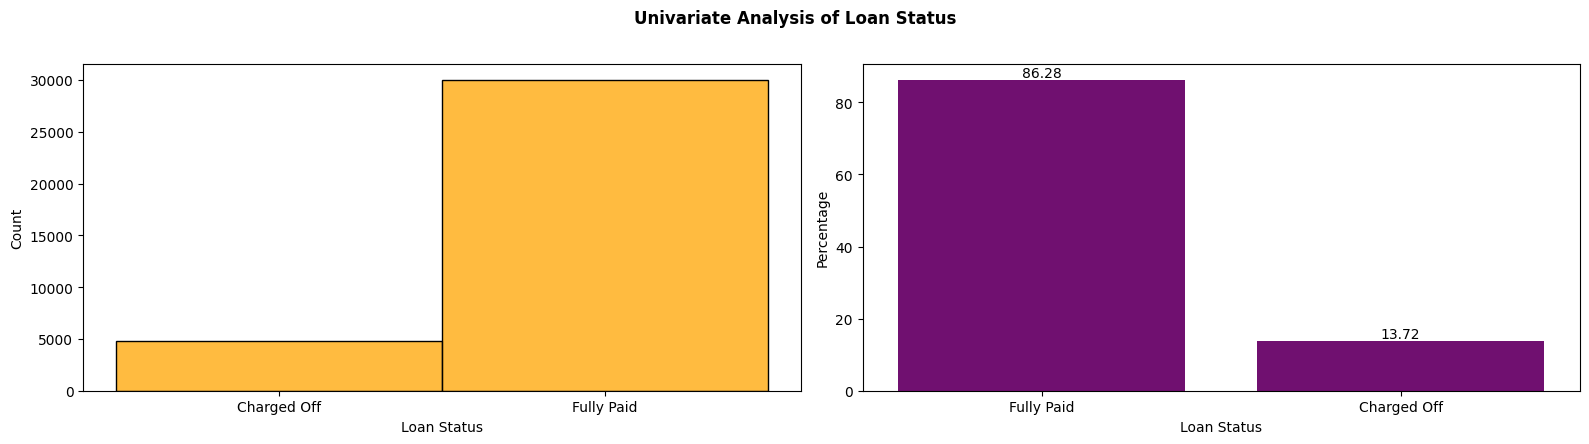

In [101]:

fig, axes = univariate_graph_cat_analysis(loan_df1,'loan_status')
axes[0].set_xlabel('Loan Status')
axes[1].set_xlabel('Loan Status')
fig.suptitle('Univariate Analysis of Loan Status',x=0.5,y=1.1,fontweight='bold')
plt.show()

#### How many loan applicants are there in each category of Employment Length?
  * 23% of the Applicants have Employment length of 10+ years.
  * 11% of the Applicants have Employment length of <1 year.
  * Only 3.3% of the Applicants have Employment length of 9 years.

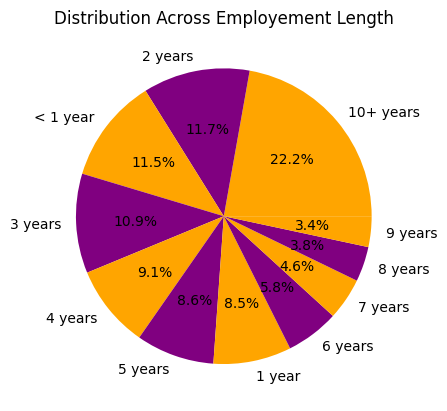

In [102]:
plt.pie(loan_df1['emp_length'].value_counts(), labels=loan_df1['emp_length'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution Across Employement Length')
plt.show()

#### Observations: How many loan applicants are there in each category of Home Ownership?
 * 49% of the Applicants have Rented Home.
 * 42% of the Applicants have Mortgage Home.
 * 7.12% of the Applicants have Owned Home.

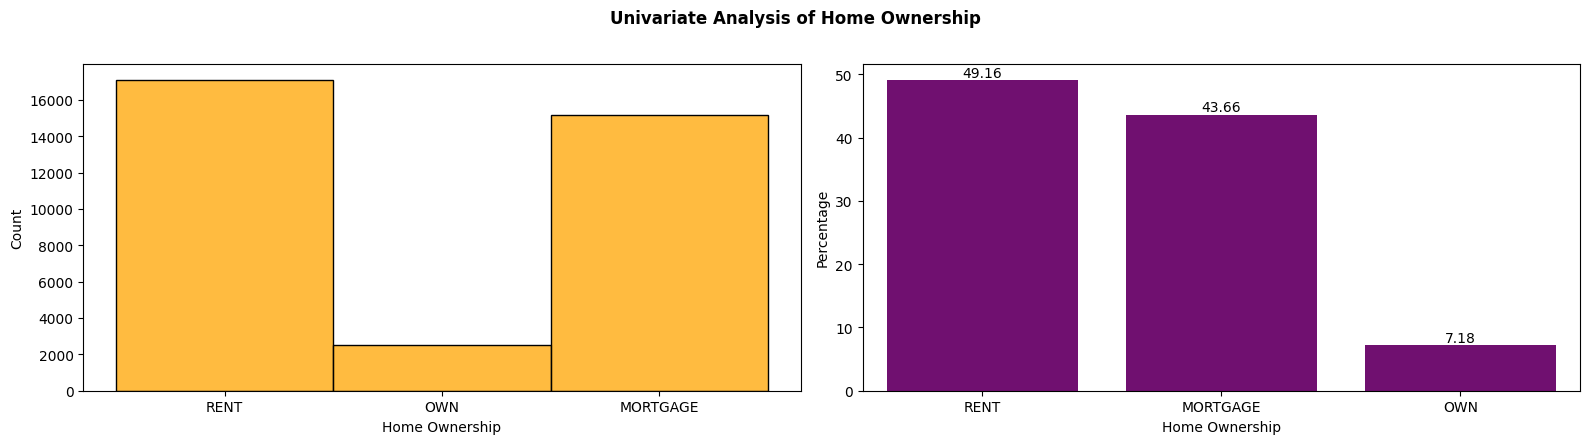

In [103]:

fig,axes = univariate_graph_cat_analysis(loan_df1, 'home_ownership')
axes[0].set_xlabel('Home Ownership')
axes[1].set_xlabel('Home Ownership')
fig.suptitle('Univariate Analysis of Home Ownership', x =0.5, y=1.1,fontweight='bold')
plt.show()

#### Observations: How many loan applicants are there in each category of Purpose of Loan?
 * 48.5% of the Applicants had applied for loan for Debt Consolidation.
 * 13.5% of the Applicants had applied for loan for Credit Card.
 * Renewable Energy has the least number of Applicants.

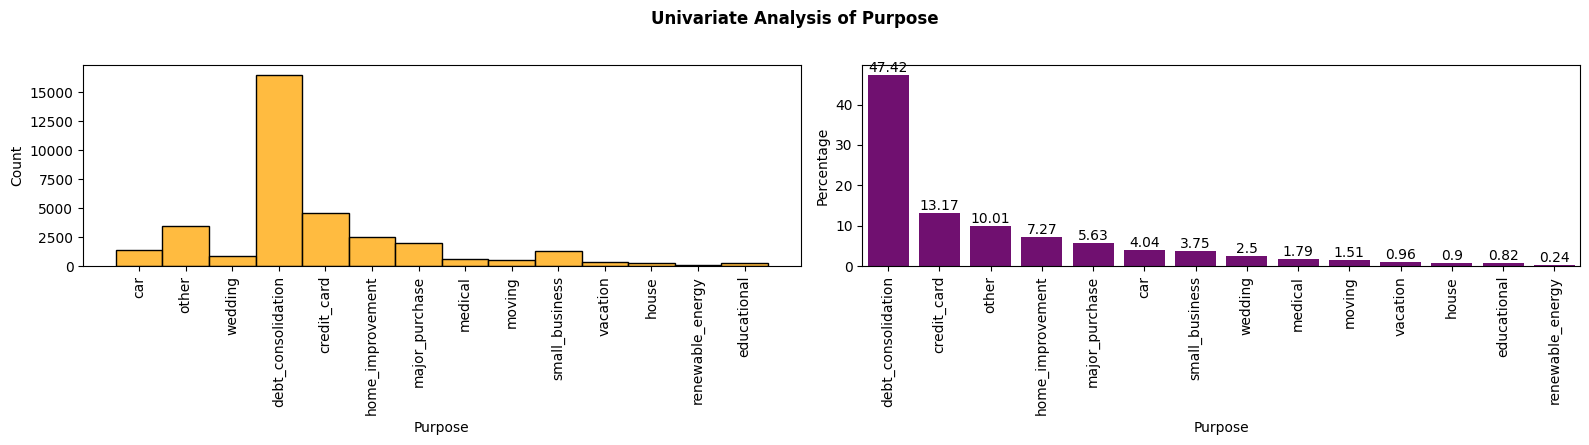

In [104]:


fig, axes = univariate_graph_cat_analysis(loan_df1,'purpose',True)
axes[0].set_xlabel('Purpose')
axes[1].set_xlabel('Purpose')
fig.suptitle('Univariate Analysis of Purpose',x=0.5,y=1.1,fontweight='bold')
plt.show()

### Conclusion from Univariate Categorical Analysis

1. **Loan Status**:
    - 85% of the applicants have fully paid their loans.
    - 15% of the applicants have defaulted on their loans.

2. **Employment Length**:
    - 23% of the applicants have an employment length of 10+ years.
    - 11% of the applicants have an employment length of less than 1 year.
    - Only 3.3% of the applicants have an employment length of 9 years.

3. **Home Ownership**:
    - 49% of the applicants have rented homes.
    - 42% of the applicants have mortgage homes.
    - 7.12% of the applicants have owned homes.

4. **Purpose of Loan**:
    - 48.5% of the applicants applied for loans for debt consolidation.
    - 13.5% of the applicants applied for loans for credit card purposes.
    - Renewable energy has the least number of applicants.

# Univariate Continuous Analysis

#### Numerical Summary of Continuous Variables

In [105]:

loan_df1.describe()

,pub_rec_bankruptcies,chargeoff_within_12_mths,collections_12_mths_ex_med,revol_util,tax_liens,total_rec_prncp,total_pymnt_inv,total_rec_int,last_pymnt_amnt,collection_recovery_fee,recoveries,total_rec_late_fee,annual_inc,loan_amnt,member_id,funded_amnt_inv,funded_amnt,id,int_rate,term,total_pymnt,total_acc,out_prncp_inv,out_prncp,pub_rec,revol_bal,inq_last_6mths,open_acc,delinq_2yrs,dti,installment,policy_code,acc_now_delinq,delinq_amnt
count,34812.0,34812.0,34812.0,34812.000000,34812.0,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000,3.481200e+04,34812.000000,3.481200e+04,34812.000000,34812.000000,3.481200e+04,34812.000000,34812.000000,34812.000000,34812.000000,34812.0,34812.0,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000,34812.0,34812.0,34812.0
mean,0.0,0.0,0.0,48.966739,0.0,9265.569637,10734.659959,1961.766379,2560.409967,11.196746,83.218485,1.307500,6.746499e+04,10475.119212,8.363769e+05,9703.197759,10247.087211,6.715131e+05,11.833730,41.644261,11311.861915,21.951482,0.0,0.0,0.054608,13000.157474,0.866483,9.289124,0.146788,13.359922,308.465014,1.0,0.0,0.0
std,0.0,0.0,0.0,28.230056,0.0,6205.488384,7597.028651,2011.189000,3975.280067,140.467291,600.103033,6.973827,6.350128e+04,6366.683976,2.629253e+05,6105.712427,6162.162190,2.076998e+05,3.590578,10.178780,7676.563590,11.343485,0.0,0.0,0.236872,15279.179384,1.062217,4.385613,0.495068,6.646594,186.204640,0.0,0.0,0.0
min,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,6.220000,0.010000,0.000000,0.000000,0.000000,4.000000e+03,500.000000,7.472400e+04,0.000000,500.000000,5.574200e+04,5.420000,36.000000,33.730000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,16.080000,1.0,0.0,0.0
25%,0.0,0.0,0.0,25.700000,0.0,4534.812500,5055.075000,645.440000,219.772500,0.000000,0.000000,0.000000,4.049975e+04,5275.000000,6.568358e+05,5000.000000,5175.000000,5.094292e+05,8.940000,36.000000,5539.122372,13.000000,0.0,0.0,0.000000,3694.750000,0.000000,6.000000,0.000000,8.260000,165.610000,1.0,0.0,0.0
50%,0.0,0.0,0.0,49.500000,0.0,8000.000000,8979.345000,1281.035000,560.910000,0.000000,0.000000,0.000000,5.800000e+04,9600.000000,8.275560e+05,8475.000000,9200.000000,6.470810e+05,11.710000,36.000000,9574.729035,20.000000,0.0,0.0,0.000000,8737.500000,1.000000,9.000000,0.000000,13.460000,273.760000,1.0,0.0,0.0
75%,0.0,0.0,0.0,72.400000,0.0,12792.117500,14817.865000,2545.077500,3373.327500,0.000000,0.000000,0.000000,8.000000e+04,15000.000000,1.029242e+06,13500.000000,14250.000000,8.215865e+05,14.270000,36.000000,15541.643370,29.000000,0.0,0.0,0.000000,16583.000000,1.000000,12.000000,0.000000,18.620000,406.780000,1.0,0.0,0.0
max,0.0,0.0,0.0,99.900000,0.0,29000.000000,45228.960000,17704.040000,28412.430000,7002.190000,21810.310000,166.429711,6.000000e+06,29000.000000,1.314167e+06,29000.000000,29000.000000,1.077430e+06,22.350000,60.000000,45560.540060,90.000000,0.0,0.0,4.000000,149588.000000,8.000000,44.000000,11.000000,29.990000,1021.000000,1.0,0.0,0.0


#### How is the distribution of Loan Amount?
  * Highest number of Applicants had applied for loan amount between 5000 to 10000 .
  * Least number of Applicants had applied for loan amount greater than 25000.
  * Average Loan Amount is 9600 (after removing outliers).

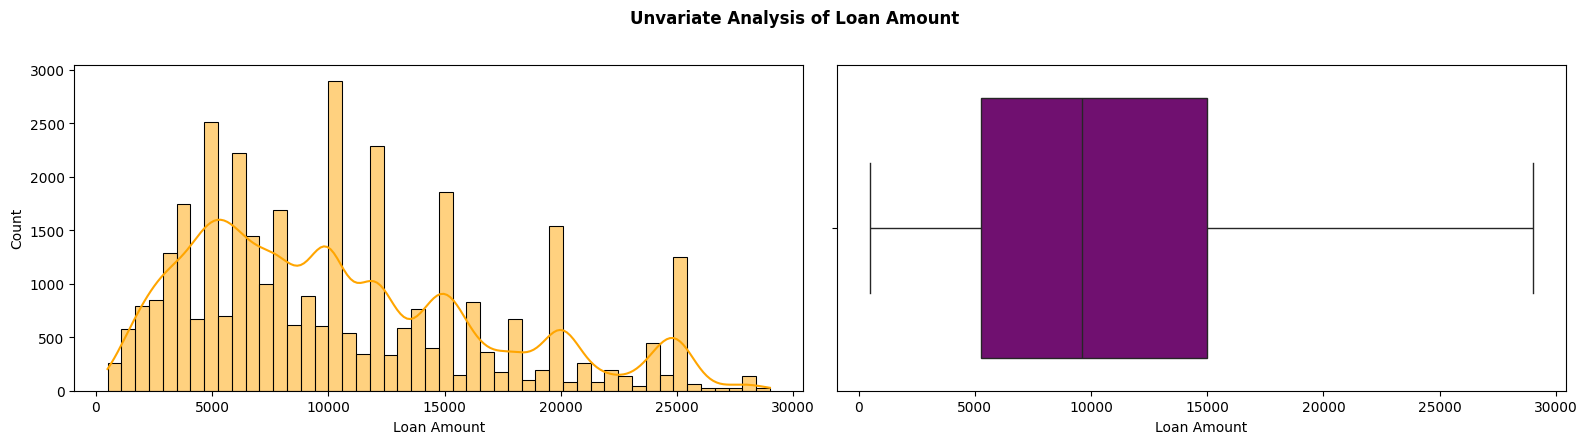

25th Percentile:  5275.0
50th Percentile:  9600.0
75th Percentile:  15000.0
None


In [106]:

fig, axes = univariate_graph_cont_analysis(loan_df1,'loan_amnt')
axes[0].set_xlabel('Loan Amount')
axes[1].set_xlabel('Loan Amount')
fig.suptitle('Unvariate Analysis of Loan Amount',x=0.5,y=1.1,fontweight='bold')
plt.show()
print(quantiles_info(loan_df1,'loan_amnt'))

#### How is the distribution of Interest Rate ?
 * Highest number of Applicants had applied for loan which had interest rate between 10.45 to 11.03.
 * Least number of Applicants had applied for loan which had interest rate greater than 20.


 * 25th Percentile of `int_rate` is 8.94 and 75th Percentile is 14.35.
 * 50th Percentile of `int_rate` is 11.78. So, the median interest rate is 11.78.

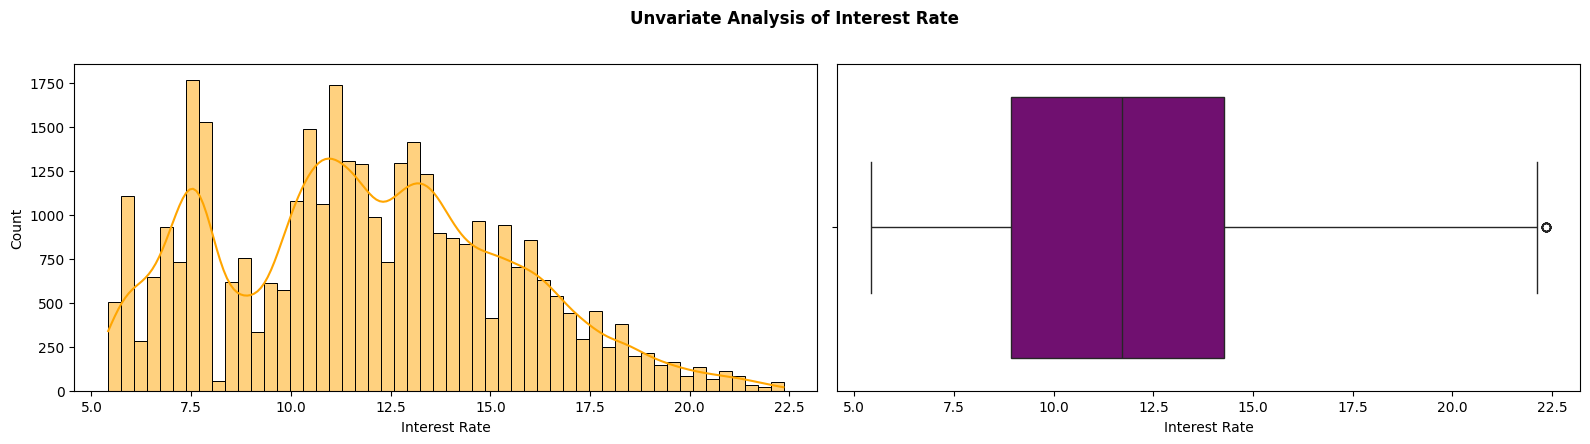

25th Percentile:  8.94
50th Percentile:  11.71
75th Percentile:  14.27
None


In [107]:

fig,axes = univariate_graph_cont_analysis(loan_df1,'int_rate')
axes[0].set_xlabel('Interest Rate')
axes[1].set_xlabel('Interest Rate')
fig.suptitle('Unvariate Analysis of Interest Rate',x=0.5,y=1.1,fontweight='bold')
plt.show()
print(quantiles_info(loan_df1,'int_rate'))

#### How is the distribution of Annual Income ?
 * Most of Loan Applicant's annual income is between 25000 and 50000.
 * Very Few Loan Applicant's annual income is above 225000.  

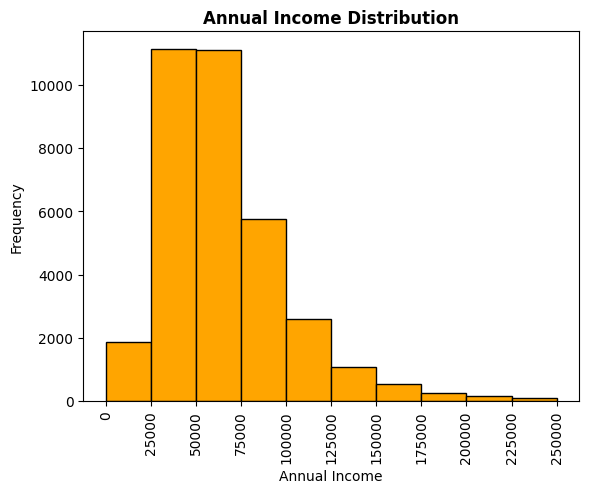

In [108]:

from matplotlib.ticker import ScalarFormatter
#ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))
plt.ticklabel_format(style='plain', axis='both')
out1, bins, out3 =plt.hist(loan_df1['annual_inc'],bins=10,range=[0,250000], label='Annual Income', edgecolor='black')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.xticks(ticks=bins, rotation=90)
plt.title('Annual Income Distribution', fontweight='bold')
plt.show()

#### How is the distribution of Debt to Income Ratio ?
 * Most of the Loan Applicant's Debt to Income Ratio is between 10 to 20.
 * Very Few Loan Applicant's Debt to Income Ratio is above 25.

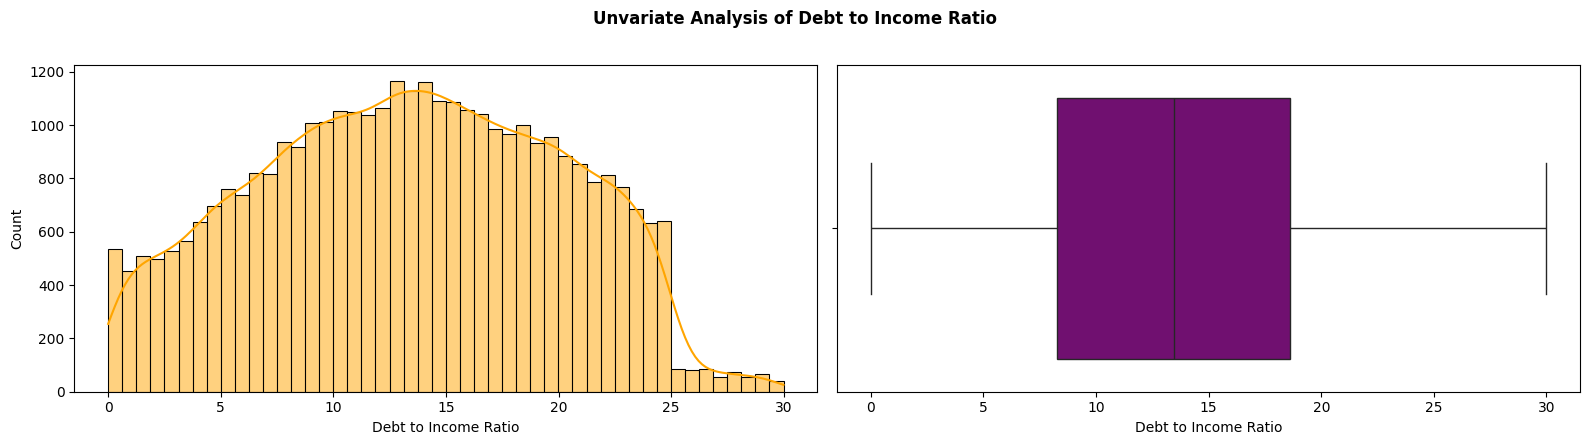

In [109]:
fig,axes = univariate_graph_cont_analysis(loan_df1,'dti')
axes[0].set_xlabel('Debt to Income Ratio')
axes[1].set_xlabel('Debt to Income Ratio')
fig.suptitle('Unvariate Analysis of Debt to Income Ratio',x=0.5,y=1.1,fontweight='bold')
plt.show()

In [110]:

# Derived Columns
loan_df1['income_class'] = pd.qcut(loan_df1['annual_inc'],3,['Lower Class','Middle Class','Upper Class'])

### Conclusion from Univariate Continuous Analysis

1. **Loan Amount**:
    - The highest number of applicants applied for loan amounts between $5,000 and $10,000.
    - The least number of applicants applied for loan amounts greater than $25,000.
    - The average loan amount is $9,600 (after removing outliers).

2. **Interest Rate**:
    - The highest number of applicants applied for loans with interest rates between 10.45% and 11.03%.
    - The least number of applicants applied for loans with interest rates greater than 20%.
    - The 25th percentile of interest rates is 8.94%, the 75th percentile is 14.35%, and the median interest rate is 11.78%.

3. **Annual Income**:
    - Most loan applicants have an annual income between $25,000 and $50,000.
    - Very few loan applicants have an annual income above $225,000.

4. **Debt-to-Income Ratio (DTI)**:
    - The distribution of DTI shows that most applicants have a DTI ratio between 10 and 20.

# Segmented Analysis

#### How does `Home Ownership` depending on `Annual Income` ?
  * Applicant's had `Mortgage` Home have high median Annual Income.
  * Applicant's had `Owned` Home have low median Annual Income. Excluding None and Other.

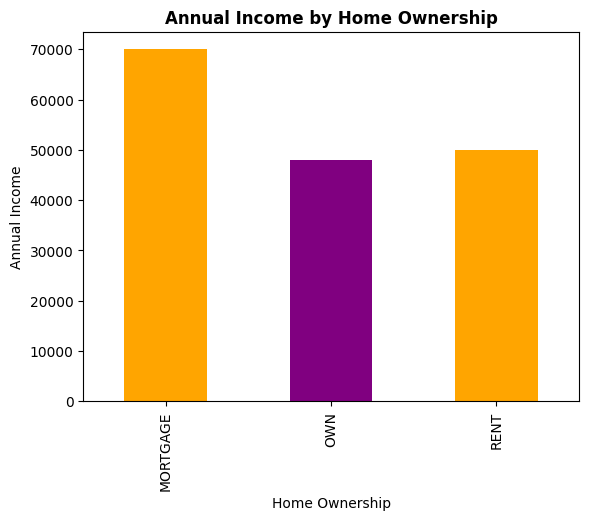

In [111]:

d = loan_df1[(loan_df1['home_ownership'] != 'OTHER') & (loan_df1['home_ownership'] != 'NONE')]
d.groupby('home_ownership')['annual_inc'].median().plot(kind='bar', color=custom_palette)
plt.xlabel('Home Ownership')
plt.ylabel('Annual Income')
plt.title('Annual Income by Home Ownership', fontweight='bold')
plt.show()

#### How does `Home Ownership` depending on `Loan Amount` ?
  * Applicant's had `Mortgage` Home have high average Loan Amount.
  * Applicant's had `Rent` Home have low average Loan Amount. Excluding None and Other.

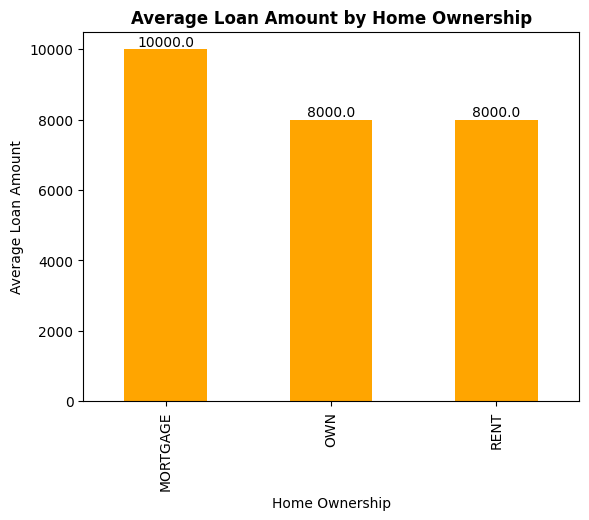

In [112]:


loan_df1.groupby('home_ownership')['loan_amnt'].median().plot(kind='bar', color='orange')
plt.xlabel('Home Ownership')
plt.ylabel('Average Loan Amount')
for i in range(len(loan_df1.groupby('home_ownership')['loan_amnt'].median())):
    plt.text(i, loan_df1.groupby('home_ownership')['loan_amnt'].median()[i], round(loan_df1.groupby('home_ownership')['loan_amnt'].median()[i],2), ha = 'center', va = 'bottom')
plt.title('Average Loan Amount by Home Ownership', fontweight='bold')
plt.show()

#### How does `Grade` depending on `Interest Rates` and `loan amount` ?
- `Interest Rates`
  * Loan's which are graded `F` have High Interest Rates.
  * Loan's which are graded `A` have Low Interest Rates.
  * `Interest Rates` are gradually increasing from `Grade A` to `Grade G`.
- `Loan Amount`
  * `Grade F` have highest `Average Loan Amount`.
  * `Grade A` have lowest `Average Loan Amount`.
  * `Grade B,C,D ` have almost same `Average Loan Amount`.</br>


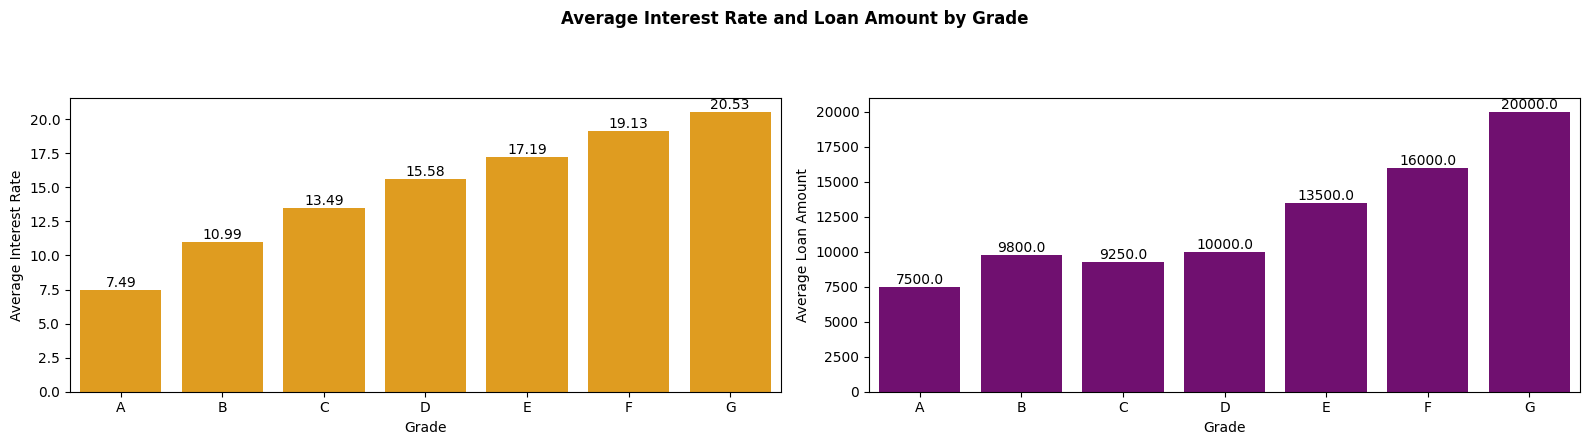

In [113]:

# Segmented across grade
fig, p = plt.subplots(1,2, figsize=(16, 4), sharex=True,sharey=False)

p1 = loan_df1.groupby('grade')['int_rate'].median()
p2 = loan_df1.groupby('grade')['loan_amnt'].median()

sns.barplot(data=p1,ax=p[0], color='orange')
sns.barplot(data=p2,ax=p[1], color='purple')
for i in range(len(p1)):
    p[0].text(i, p1[i], round(p1[i],2), ha = 'center', va = 'bottom')
    p[1].text(i, p2[i], round(p2[i],2), ha = 'center', va = 'bottom')

p[0].set_ylabel('Average Interest Rate')
p[1].set_ylabel('Average Loan Amount')
p[0].set_xlabel('Grade')
p[1].set_xlabel('Grade')
fig.suptitle('Average Interest Rate and Loan Amount by Grade',x=0.5,y=1.1,fontweight='bold')
plt.tight_layout()
plt.show()


#### What's average interest rate and loan_amount across Loans Term ?
- `Interest Rates`
  * Long Term Loans (60 months) have high `Interest Rates` due to high risk involved so lenders expect high returns.
  * Short Term Loans (36 months) have low `Interest Rates` due to low risk involved so lenders expect low returns.

- `Loan Amount`
   * Total Loan Amount is high for `36 months` term loans which shows Lenders are more interested in giving loans for 36 months term where risk is low and interest rates are low.

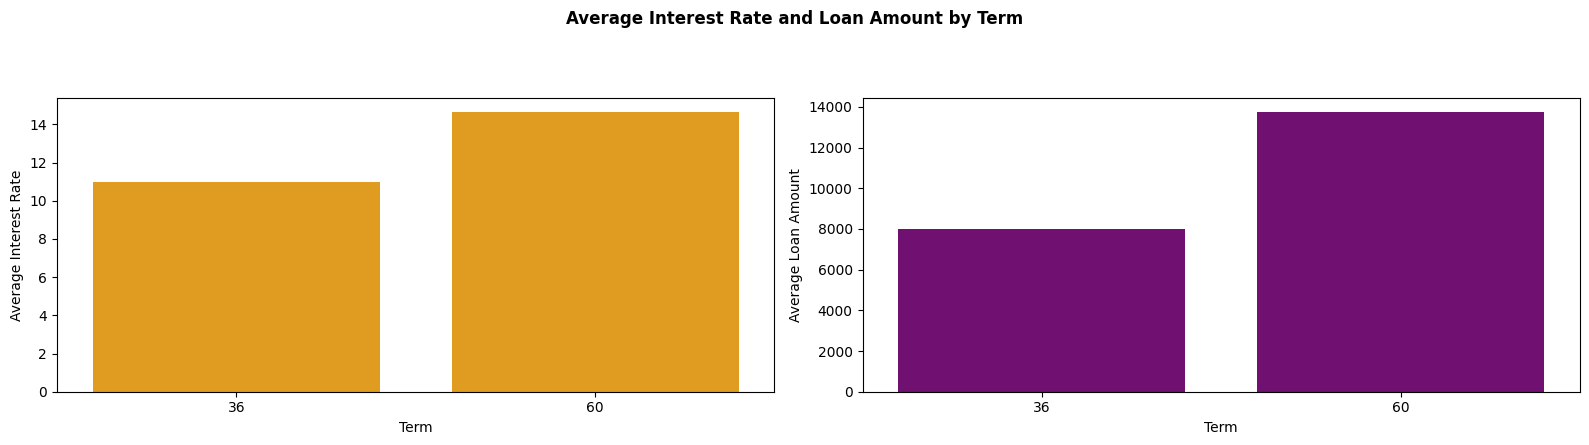

In [114]:

fig, p = plt.subplots(1,2, figsize=(16, 4), sharex=True,sharey=False)

p1 = loan_df1.groupby('term')['int_rate'].median()
p2 = loan_df1.groupby('term')['loan_amnt'].median()

sns.barplot(data=p1,ax=p[0],color='orange')
sns.barplot(data=p2,ax=p[1],color='purple')

p[0].set_ylabel('Average Interest Rate')
p[1].set_ylabel('Average Loan Amount')
p[0].set_xlabel('Term')
p[1].set_xlabel('Term')
plt.subplots_adjust(wspace=0.5)
fig.suptitle('Average Interest Rate and Loan Amount by Term',x=0.5,y=1.1,fontweight='bold')
plt.tight_layout()
plt.show()

#### How much total Loan Amount is defaulted ?
 * Approx 60 Millions of Loan Amounts is Default which mean Loss is 60 Millions

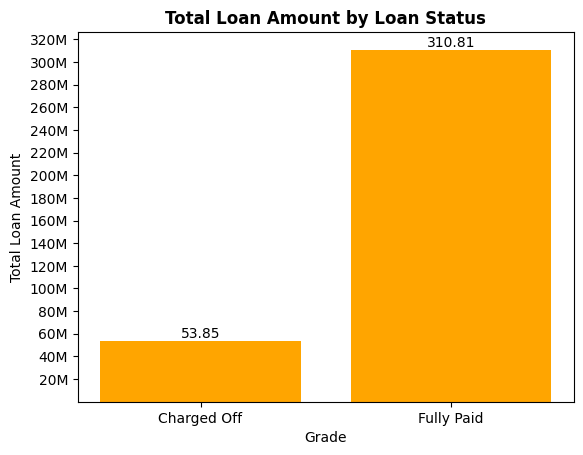

In [115]:

x = loan_df1.groupby('loan_status')['loan_amnt'].sum()
plt.ticklabel_format(style='plain', axis='both')
plt.bar(x.index, x.values)
plt.xlabel('Grade')
plt.ylabel('Total Loan Amount')
ticks = np.arange( 20000000,320000001,20000000)
labels = ['20M','40M','60M','80M','100M','120M','140M','160M','180M','200M','220M','240M','260M','280M','300M','320M']
plt.yticks(ticks,labels)
for i in range(len(x)):
    plt.text(i, x[i], round(x[i]/1000000,2), ha = 'center', va = 'bottom')
plt.title('Total Loan Amount by Loan Status', fontweight='bold')
plt.show()

#### What's average interest rate of Defaulters ?
  * Defaulters have high `Interest Rates` compared to Non-Defaulters.
  * Non-Defaulters have low `Interest Rates` compared to Defaulters.
  * High Interest Rate is more likely to default the loan.

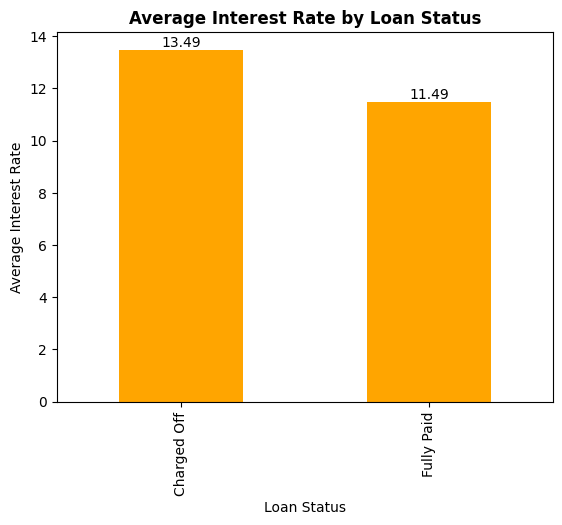

In [116]:

loan_df1.groupby('loan_status')['int_rate'].median().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Average Interest Rate')
for i in range(len(loan_df1.groupby('loan_status')['int_rate'].median())):
    plt.text(i, loan_df1.groupby('loan_status')['int_rate'].median()[i], round(loan_df1.groupby('loan_status')['int_rate'].median()[i],2), ha = 'center', va = 'bottom')
plt.title('Average Interest Rate by Loan Status', fontweight='bold')
plt.show()


#### Which are top 5 US-States which highest Total Loan Amount ?
  * `CA` has highest Total Loan Amount.
  * `NY` has second highest Total Loan Amount.
  * `TX` has third highest Total Loan Amount.
  * `FL` has fourth highest Total Loan Amount.
  * `NJ` has fifth highest Total Loan Amount.

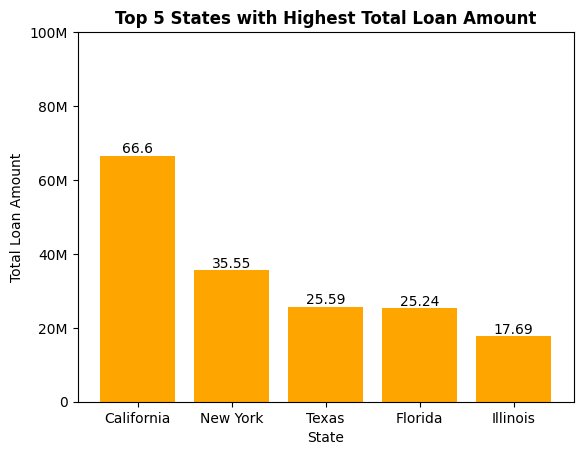

In [117]:

# Top 5 States with Highest Loan Amount
x = loan_df1.groupby('addr_state')['loan_amnt'].sum().sort_values(ascending=False)
plt.bar(x.index[:5], x.values[:5])
ticks = np.arange(0,100000001,20000000)
labels = ['0','20M','40M','60M','80M','100M']
plt.yticks(ticks,labels)
plt.xlabel('State')
plt.ylabel('Total Loan Amount')
plt.xticks([0,1,2,3,4],['California','New York','Texas','Florida','Illinois'])
for i in range(5):
    plt.text(i, x[i], round(x[i]/1000000,2), ha = 'center', va = 'bottom')
plt.title('Top 5 States with Highest Total Loan Amount', fontweight='bold')
plt.show()

#### Which Loan Purpose has highest Total Loan Amount ?
  * `Debt Consolidation` has highest Total Loan Amount.
  * `Credit Card` has second highest Total Loan Amount.
  * `Home Improvement` has third highest Total Loan Amount.
  * `Other` has fourth highest Total Loan Amount.
  * `Major Purchase` has fifth highest Total Loan Amount.

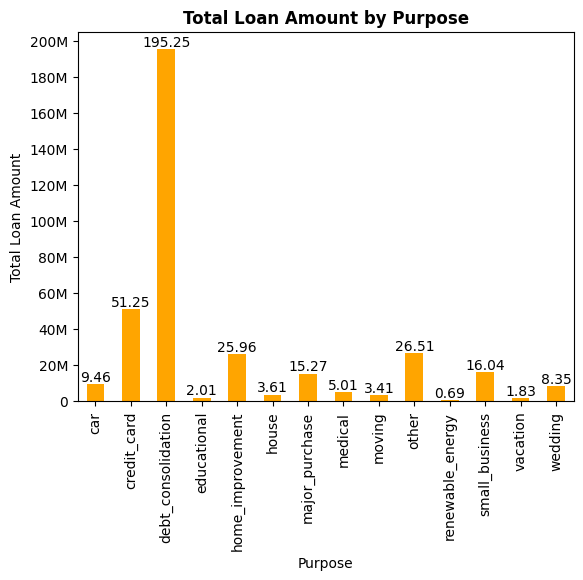

In [118]:

loan_df1.groupby('purpose')['loan_amnt'].sum().plot(kind='bar')
ticks = np.arange(0,200000001,20000000)
labels = ['0','20M','40M','60M','80M','100M','120M','140M','160M','180M','200M']
plt.yticks(ticks,labels)
plt.xlabel('Purpose')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Purpose', fontweight='bold')
for i in range(len(loan_df1.groupby('purpose')['loan_amnt'].sum())):
    plt.text(i, loan_df1.groupby('purpose')['loan_amnt'].sum()[i], round(loan_df1.groupby('purpose')['loan_amnt'].sum()[i]/1000000,2), ha = 'center', va = 'bottom')
plt.show()

#### Which Income Class have high Average default loans amounts ?
 *  Upper Class have highest Average Default Loan Amounts.
 *  Lower Class have lowest Average Default Loan Amounts.

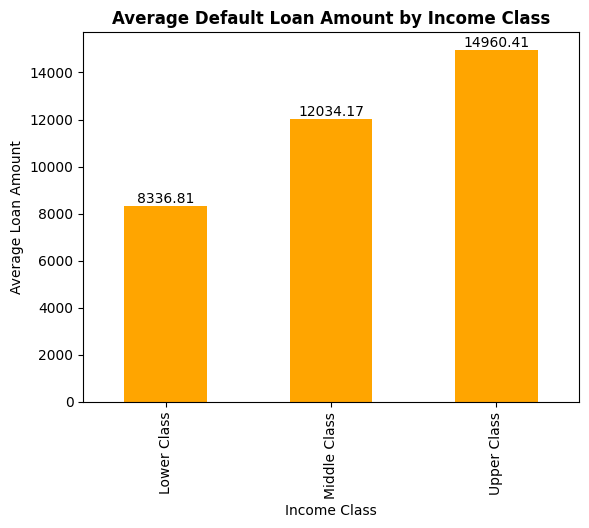

In [119]:

d = loan_df1[loan_df1['loan_status'] == "Charged Off"]
d.groupby('income_class')['loan_amnt'].mean().plot(kind='bar')
plt.xlabel('Income Class')
plt.ylabel('Average Loan Amount')
plt.title('Average Default Loan Amount by Income Class', fontweight='bold')
for i in range(len(d.groupby('income_class')['loan_amnt'].mean())):
    plt.text(i, d.groupby('income_class')['loan_amnt'].mean()[i], round(d.groupby('income_class')['loan_amnt'].mean()[i],2), ha = 'center', va = 'bottom')
plt.show()


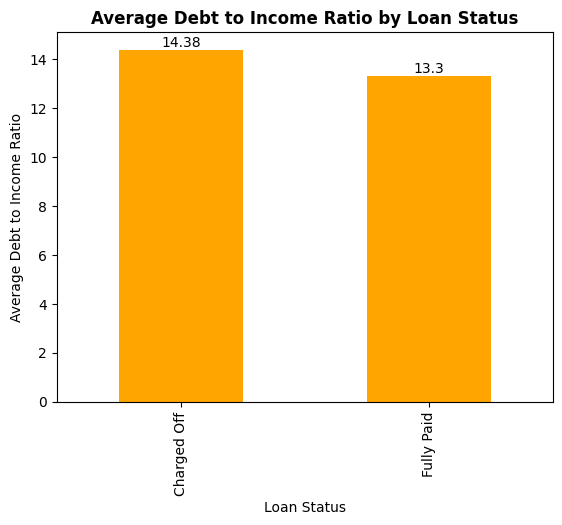

In [120]:

loan_df1.groupby('loan_status')['dti'].median().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Average Debt to Income Ratio')
plt.title('Average Debt to Income Ratio by Loan Status', fontweight='bold')
for i in range(len(loan_df1.groupby('loan_status')['dti'].median())):
    plt.text(i, loan_df1.groupby('loan_status')['dti'].median()[i], round(loan_df1.groupby('loan_status')['dti'].median()[i],2), ha = 'center', va = 'bottom')
plt.show()

### Conclusion from Segmented Analysis

1. **Home Ownership and Annual Income**:
    - Applicants with `Mortgage` homes have the highest median annual income.
    - Applicants with `Owned` homes have the lowest median annual income.

2. **Home Ownership and Loan Amount**:
    - Applicants with `Mortgage` homes have the highest average loan amount.
    - Applicants with `Rent` homes have the lowest average loan amount.

3. **Grade and Interest Rates**:
    - Loans graded `F` have the highest interest rates.
    - Loans graded `A` have the lowest interest rates.
    - Interest rates gradually increase from `Grade A` to `Grade G`.

4. **Grade and Loan Amount**:
    - `Grade F` loans have the highest average loan amount.
    - `Grade A` loans have the lowest average loan amount.
    - `Grade B`, `C`, and `D` loans have almost the same average loan amount.

5. **Loan Term and Interest Rates**:
    - Long-term loans (60 months) have higher interest rates due to higher risk.
    - Short-term loans (36 months) have lower interest rates due to lower risk.

6. **Loan Term and Loan Amount**:
    - Total loan amount is higher for 36-month term loans, indicating lenders' preference for lower-risk, lower-interest loans.

7. **Total Loan Amount Defaulted**:
    - Approximately 60 million dollars of loan amounts are defaulted, indicating a significant loss.

8. **Interest Rates of Defaulters**:
    - Defaulters have higher interest rates compared to non-defaulters.
    - High interest rates are more likely to result in loan defaults.

9. **Top 5 US States with Highest Total Loan Amount**:
    - `CA` has the highest total loan amount.
    - `NY`, `TX`, `FL`, and `NJ` follow in descending order.

10. **Loan Purpose with Highest Total Loan Amount**:
    - `Debt Consolidation` has the highest total loan amount.
    - `Credit Card`, `Home Improvement`, `Other`, and `Major Purchase` follow in descending order.

11. **Income Class and Average Default Loan Amounts**:
    - Upper Class has the highest average default loan amounts.
    - Lower Class has the lowest average default loan amounts.

# Bivariate Categorical Analysis

#### How does `Loan Status` varies across  `Loan Term` ?
 * Borrowers with "Fully Paid" loans dominate in both 36-month and 60-month terms.
 * Borrowers with "Charged Off" loans are riskier, as the amounts are smaller and skewed towards the longer (60-month) term.

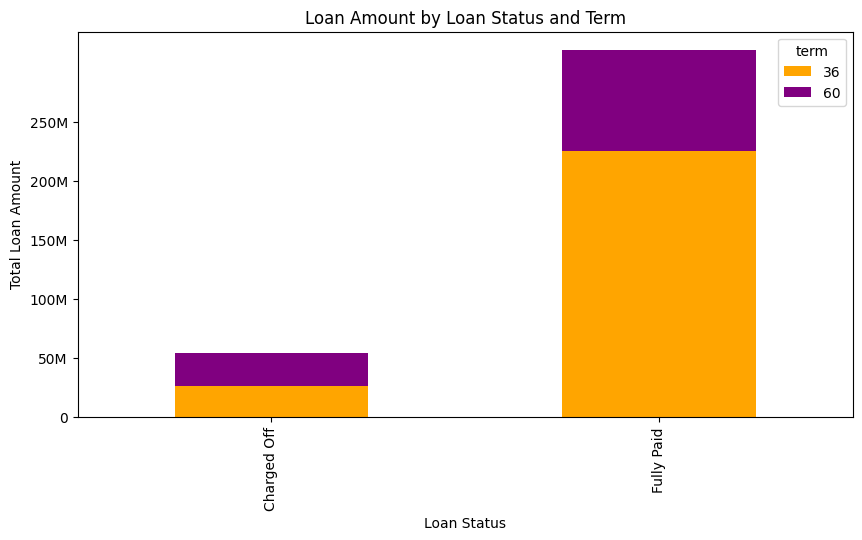

In [121]:

pv = pd.pivot_table(loan_df1, index='loan_status', columns='term', values='loan_amnt', aggfunc='sum')
pv.plot(kind='bar', stacked=True, figsize=(10,5))
ticks = np.arange(0,250000001,50000000)
labels = ['0','50M','100M','150M','200M','250M']
plt.yticks(ticks,labels)
plt.xlabel('Loan Status')
plt.ylabel('Total Loan Amount')
plt.title('Loan Amount by Loan Status and Term')
plt.show()

#### Which have high default rate among Loan Terms ?
 * 60 Months Loan Term have high default rate where Lenders have high risk and high return.
 * 36 Months Loan Term have low default rate where Lenders have low risk and low return.

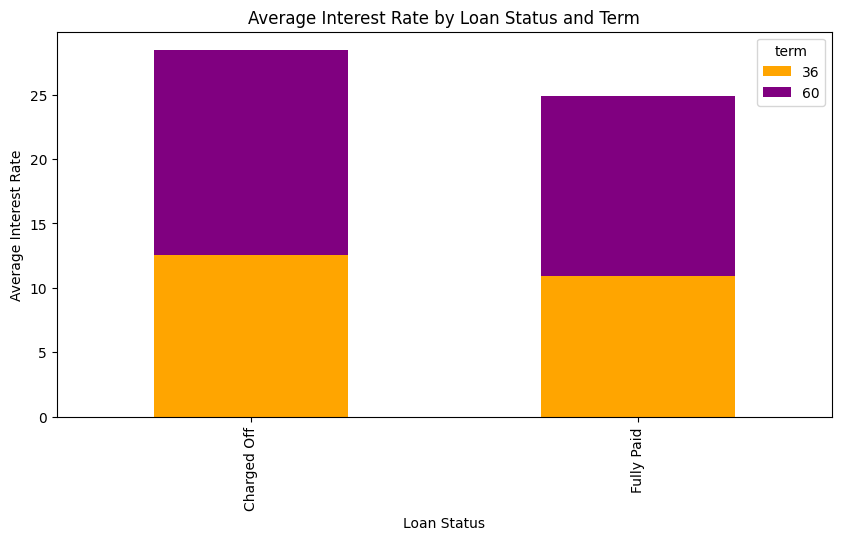

In [122]:

pv = pd.pivot_table(loan_df1, index='loan_status', columns='term', values='int_rate', aggfunc='median')
pv.plot(kind='bar', stacked=True, figsize=(10,5))
plt.ylabel('Average Interest Rate')
plt.title('Average Interest Rate by Loan Status and Term')
plt.xlabel('Loan Status')
plt.show()

#### How does `Loan Status` varies across `Grade` ?
 * The majority of the loan amount for "Charged Off" loans is concentrated in grades B, C, and D. This suggests that loans with lower grades (indicating higher risk) are more likely to be charged off.
 
 * The loan amount for "Fully Paid" loans is distributed across a wider range of grades, with a significant portion in grades B, C, and D, as well as a substantial amount in grade A. This suggests that a mix of loan grades contribute to the total amount of fully paid loans.

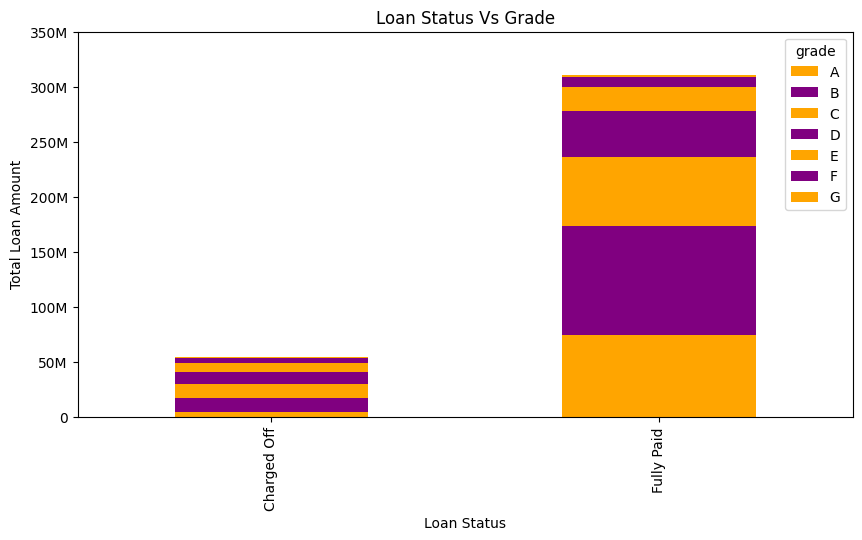

In [123]:

pv = pd.pivot_table(loan_df1, index='loan_status', columns='grade', values='loan_amnt', aggfunc='sum')
pv.plot(kind='bar', stacked=True, figsize=(10,5))
ticks = np.arange(0,350000001,50000000)
labels = ['0','50M','100M','150M','200M','250M', '300M', '350M']
plt.yticks(ticks,labels)
plt.xlabel('Loan Status')
plt.ylabel('Total Loan Amount')
plt.title('Loan Status Vs Grade')
plt.show()

### Conclusion from Bivariate Categorical Analysis

1. **Loan Status and Loan Term**:
    - Borrowers with "Fully Paid" loans dominate in both 36-month and 60-month terms.
    - Borrowers with "Charged Off" loans are riskier, as the amounts are smaller and skewed towards the longer (60-month) term.

2. **Loan Status and Interest Rates**:
    - 60-month loan terms have higher default rates where lenders have high risk and high return.
    - 36-month loan terms have lower default rates where lenders have low risk and low return.

3. **Loan Status and Grade**:
    - Loans graded `F` have the highest interest rates and are more likely to default.
    - Loans graded `A` have the lowest interest rates and are less likely to default.
    - Interest rates gradually increase from `Grade A` to `Grade G`.

4. **Loan Status and Purpose**:
    - The purpose of the loan also influences the loan status, with certain purposes like debt consolidation having higher total loan amounts.

# Bivariate Continuous Analysis

#### Loan Amount vs Interest Rate
 * Higher loan amounts tend to have higher or lower interest rates.

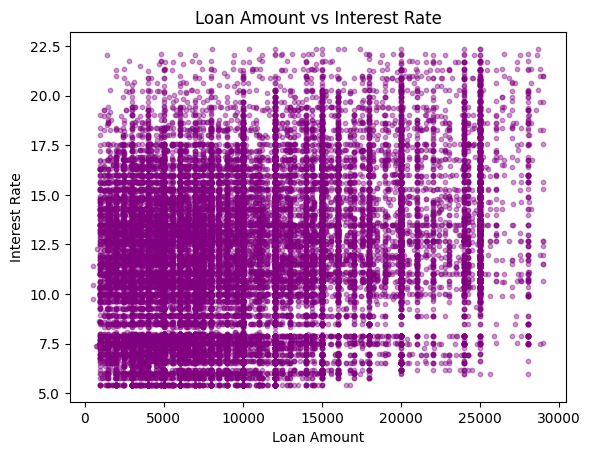

In [124]:

plt.scatter(loan_df1['loan_amnt'], loan_df1['int_rate'], color='purple',alpha=0.4, s=10)
plt.title('Loan Amount vs Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

#### Interest Rate Vs Annual Income
 * There appears to be a weak negative correlation between interest rate and annual income. 
 * This suggests that borrowers with higher annual incomes tend to have lower interest rates. Lenders might perceive borrowers with higher incomes as having a lower risk of default.

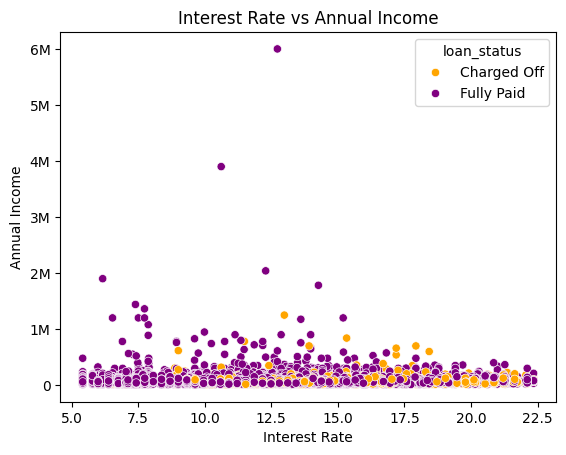

In [125]:

sns.scatterplot(data=loan_df1, x='int_rate', y='annual_inc', hue='loan_status')
ticks = np.arange(0,6000001,1000000)
labels = ['0','1M','2M','3M','4M','5M','6M']
plt.yticks(ticks,labels)
plt.xlabel('Interest Rate')
plt.ylabel('Annual Income')
plt.title('Interest Rate vs Annual Income')
plt.show()

In [126]:

months = pd.DatetimeIndex(loan_df1['issue_d']).month
years = pd.DatetimeIndex(loan_df1['issue_d']).year


#### Interest Rates across Issued Years
 * Charged Off :
    * Interest rates have been increasing over the years.
    * The interest rates for charged off loans are higher than fully paid loans.
 * Fully Paid :
    * Interest rates increases till 2009 and then decreases.
    * The interest rates for fully paid loans are lower than charged off loans.

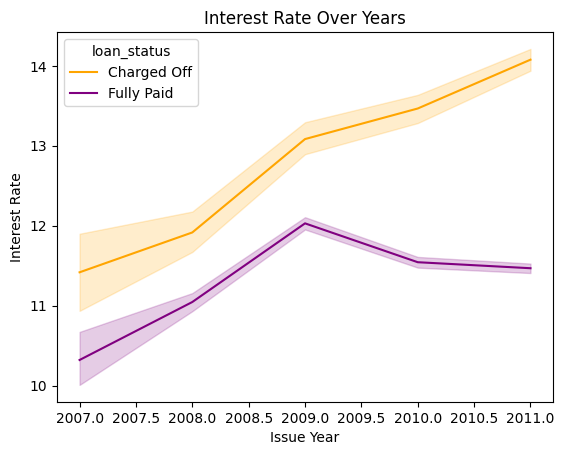

In [127]:

sns.lineplot(data=loan_df1,x=years,y=loan_df1['int_rate'], color='purple',hue='loan_status')
plt.title('Interest Rate Over Years')
plt.ylabel('Interest Rate')
plt.xlabel('Issue Year')
plt.show()

#### How loan_amnt have varied over time for each loan status ?
 *  The line for "Charged Off" loans starts at a higher level and gradually decreases. This suggests that initially, larger loans were more likely to be charged off.
 * The line for "Fully Paid" loans starts at a lower level and gradually increases. This suggests that initially, smaller loans were more likely to be fully paid.

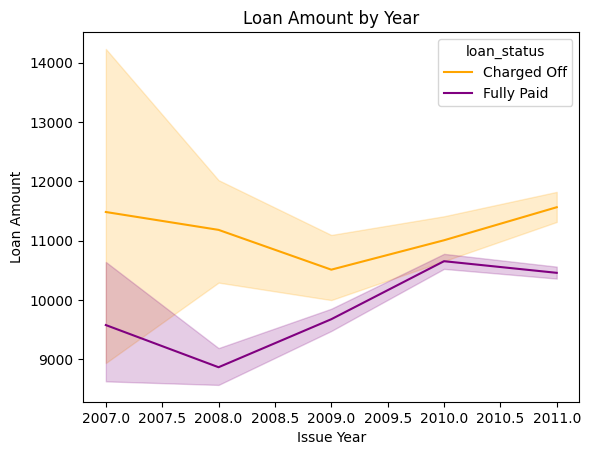

In [128]:

sns.lineplot(data=loan_df1,x=years,y=loan_df1['loan_amnt'], color='orange', hue='loan_status')
plt.title('Loan Amount by Year')
plt.ylabel('Loan Amount')
plt.xlabel('Issue Year')
plt.show()

#### How does `interest rate` depends on `debt-to-income ratio` ?
 * There is a weak positive correlation between interest rate and debt-to-income ratio. This suggests that borrowers with higher debt-to-income ratios tend to have higher interest rates. Lenders might perceive borrowers with higher debt-to-income ratios as having a higher risk of default.
*  Concentration of data where moderate int_rate values (10 to 13) correspond to moderate dti values (10 to 15). This could indicate a relationship or a common range for both variables


Interest Rate Vs DTI


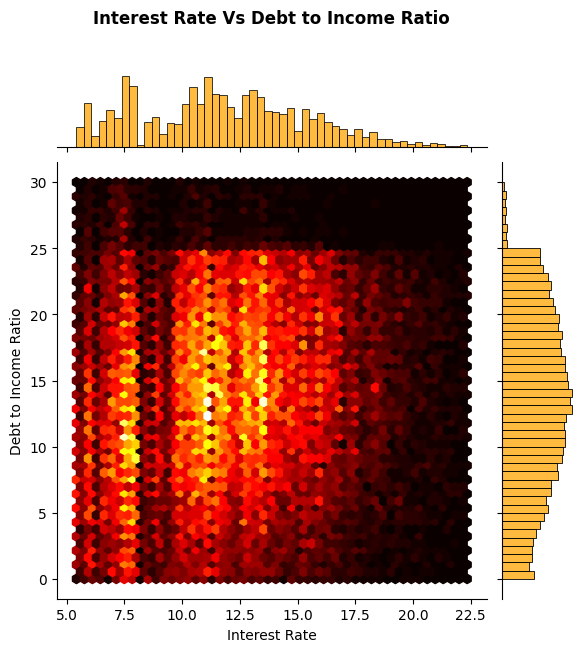

In [129]:
print('Interest Rate Vs DTI')
sns.jointplot(data=loan_df1,x='int_rate',y='dti',kind='hex',cmap='hot')
plt.xlabel('Interest Rate')
plt.ylabel('Debt to Income Ratio')
plt.title('Interest Rate Vs Debt to Income Ratio', fontweight='bold', x=0.5, y=1.3)
plt.show()

#### How does `loan amount` depends on `debt-to-income ratio` ?
* The vertical segmentation in the hexbin plot and the spikes in the loan_amnt histogram indicate that specific loan sizes are more commonly issued (e.g., 5,000, 10,000, 15,000).
* Most borrowers have a dti between 10 and 15, and loans are frequently issued in the 10,000–15,000 range.

Loan Amount vs DTI


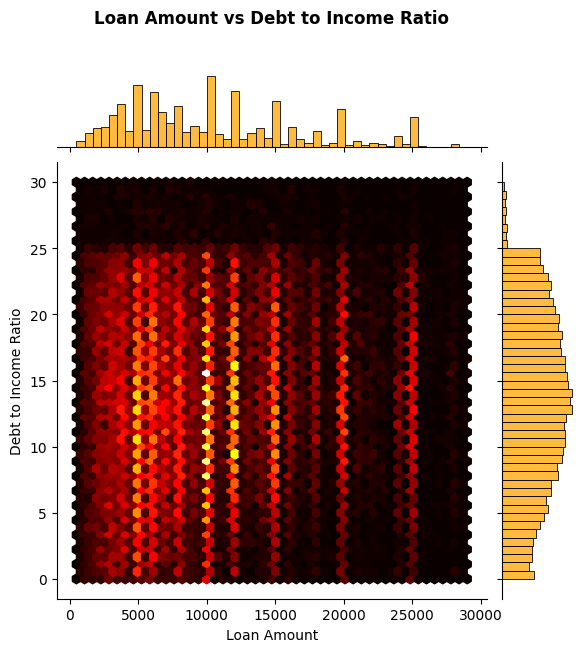

In [130]:
print('Loan Amount vs DTI')
sns.jointplot(data=loan_df1,x='loan_amnt',y='dti',kind='hex',cmap='hot')
plt.xlabel('Loan Amount')
plt.ylabel('Debt to Income Ratio')
plt.title('Loan Amount vs Debt to Income Ratio', fontweight='bold',x=0.5,y=1.3)
plt.show()

### Conclusion from Bivariate Continuous Analysis

1. **Loan Amount vs Interest Rate**:
    - Higher loan amounts tend to have higher or lower interest rates.

2. **Interest Rate vs Annual Income**:
    - There is no clear trend between interest rates and annual income.
    - However, charged-off loans tend to have higher interest rates compared to fully paid loans.

3. **Interest Rates across Issued Years**:
    - For charged-off loans, interest rates have been increasing over the years.
    - For fully paid loans, interest rates increased until 2009 and then decreased.
    - Charged-off loans have higher interest rates compared to fully paid loans.

4. **Loan Amount over Time by Loan Status**:
    - The loan amount has varied over time for each loan status.
    - Fully paid loans tend to have a more stable loan amount over the years.
    - Charged-off loans show more variability in loan amounts over the years.

# Multivariate Analysis

#### How does Default Loan Amount changes with respect to Issue Date Years ?
  * `Fully Paid` loans amount increases with increase in `issue_d` year.
  * `Charged Off` loans amount increases with increase in `issue_d` year.

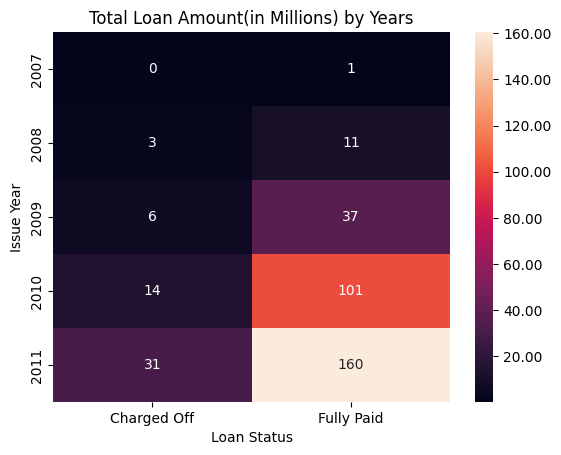

In [131]:

d = loan_df1[loan_df1['loan_status'] != "Current"]
years_d = pd.DatetimeIndex(d['issue_d']).year
pv = pd.pivot_table(d, index=years_d, columns='loan_status', values='loan_amnt', aggfunc='sum')
pv = pv/1000000
sns.heatmap(pv, annot=True,fmt='.0f',cbar_kws={'format': '%.2f'})
plt.title('Total Loan Amount(in Millions) by Years')
plt.xlabel('Loan Status')
plt.ylabel('Issue Year')
plt.show()

#### How does `Loan Amount` and `Interest Rate` vary with `Loan Status` ?
  * Defaulters have high `Loan Amount` and high `Interest Rate`.
  * Non-Defaulters have low `Loan Amount` and low `Interest Rate`.

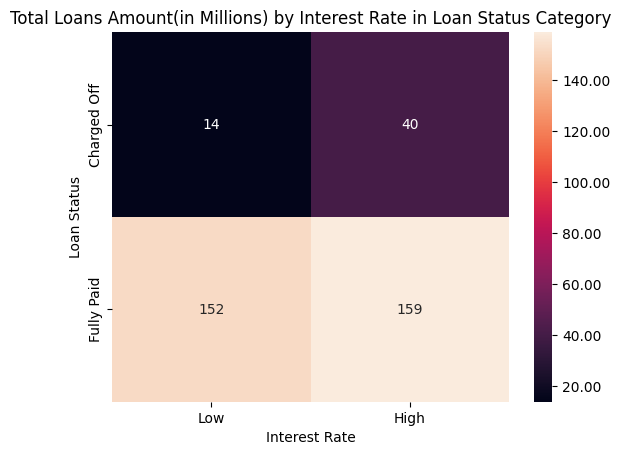

In [132]:

int_class = pd.qcut(loan_df1['int_rate'],q=2,labels=['Low','High'])
pv = pd.pivot_table(data=loan_df1,index='loan_status',columns=int_class,values='loan_amnt',aggfunc='sum')
pv = pv / 1_000_000
sns.heatmap(pv, annot=True, fmt='.0f',cbar_kws={'format': '%.2f'})

plt.title('Total Loans Amount(in Millions) by Interest Rate in Loan Status Category')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
plt.show()

#### Which states have Highest Default Loan Amount ?
 * CA has highest total loan amount and highest default total amount.
 * NY has second highest total loan amount and second highest default total amount.
 * TX has lowest lowest default total amount.

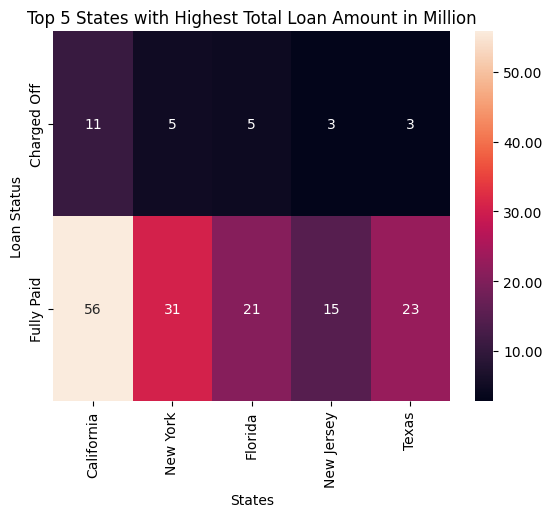

In [133]:

pv = pd.pivot_table(loan_df1, index='loan_status', columns='addr_state', values='loan_amnt', aggfunc='sum', sort=True)
pv = pv.sort_values('Charged Off',ascending=False, axis=1).iloc[:,:5]
pv = pv / 1_000_000
sns.heatmap(pv,annot=True, fmt='.0f',cbar_kws={'format': '%.2f'})
plt.title('Top 5 States with Highest Total Loan Amount in Million')
plt.xlabel('States')
plt.ylabel('Loan Status')
plt.xticks([0.5,1.5,2.5,3.5,4.5],['California','New York', 'Florida','New Jersey','Texas'], rotation=90)
plt.show()

#### How Average Loan Amount varies with Grade and Loan Status ?
- Higher Risk Grades:
  * Applicants in grades E and F show the highest loan amounts for "Charged Off" (11,750 and 18,000 respectively).  These grades are riskier compared to lower grades.
- Moderate Risk Grades:
  * Grades B, C, and D have moderate "Charged Off" amounts (9,900 to 10,000). Risk levels here are relatively balanced.
- Lower Risk Grades:
  * Grade A has the lowest "Charged Off" amount (7,550), indicating less risky applicants.

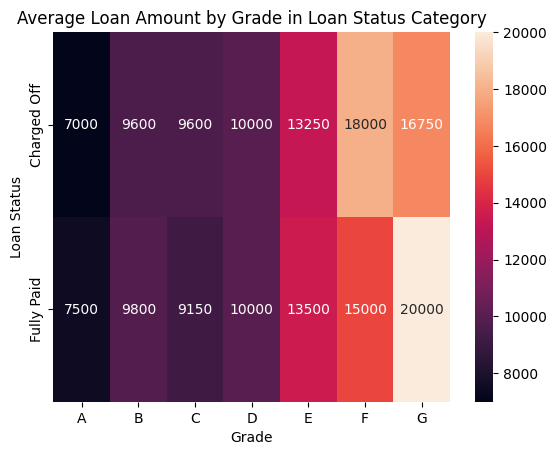

In [134]:

pv = pd.pivot_table(loan_df1, index='loan_status', columns='grade', values='loan_amnt', aggfunc='median')
sns.heatmap(pv,annot=True, fmt='g')
plt.title('Average Loan Amount by Grade in Loan Status Category')
plt.xlabel('Grade')
plt.ylabel('Loan Status')
plt.show()

#### Which Employment Length have high Default Loan Amount ?
* Despite of Stable Employement Length, there are some loan defaulters like 10+ and 9 years with high loan amount.
* Applicants with unstable employment length and with low loan amount are risky loan applicants.

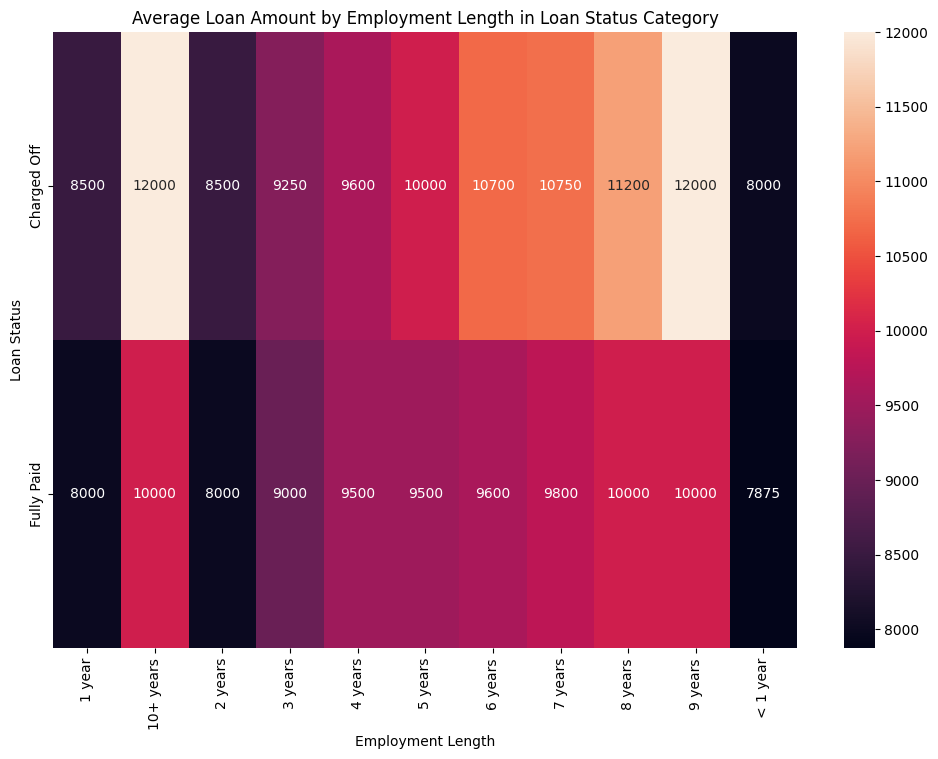

In [135]:

pv = pd.pivot_table(data=loan_df1,index='loan_status', columns='emp_length', values='loan_amnt', aggfunc='median')
plt.figure(figsize=(12,8))
sns.heatmap(pv, annot=True, fmt='g')
plt.xticks(rotation=90)
plt.title('Average Loan Amount by Employment Length in Loan Status Category')
plt.xlabel('Employment Length')
plt.ylabel('Loan Status')
plt.show()


#### Which loan purpose have high default loan amount ?
 * `Small Business` 
 * `Debt Consolidation`
 * `Credit Card` 


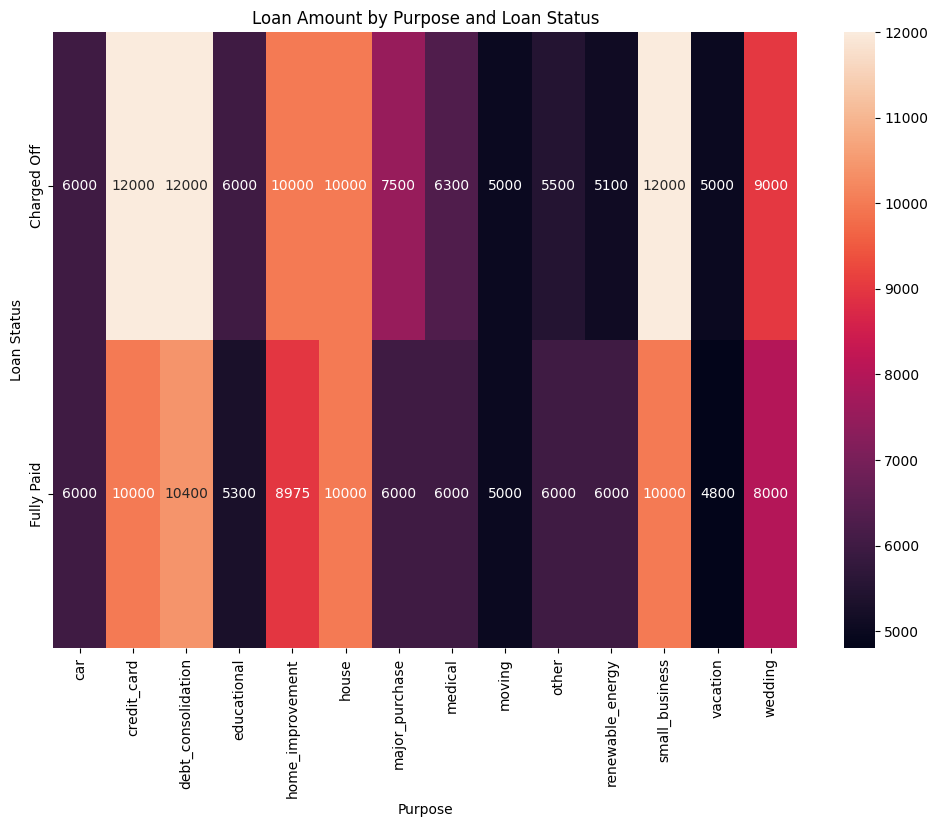

In [136]:

pv = pd.pivot_table(data=loan_df1,index='loan_status', columns='purpose', values='loan_amnt',  aggfunc='median')
plt.figure(figsize=(12,8))
sns.heatmap(pv, annot=True, fmt='g')
plt.xticks(rotation=90)
plt.title('Loan Amount by Purpose and Loan Status')
plt.xlabel('Purpose')
plt.ylabel('Loan Status')
plt.show()
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z=pv.values)])
fig.update_layout(title='Loan Amount by Purpose and Loan Status')

fig.show()

#### How continuous variables correlated to each other ?

- Positive Correlations:

    * `loan_amnt` and `total_rec_prncp`: A strong positive correlation (0.85) indicates that borrowers with larger loan amounts tend to pay back more principal. This is intuitive, as larger loans naturally lead to higher principal repayments.

    * `total_rec_int` and `int_rate`: A moderate positive correlation (0.51) suggests that borrowers with higher interest rates generally pay more in total interest over the loan term. This is expected as higher interest rates lead to higher monthly payments and thus, more interest paid over time.

    * `total_rec_int` and `loan_amnt` : A moderate positive correlation (0.71) indicates that borrowers with larger loan amounts tend to pay more in total interest. This is likely due to the compounding effect of interest on larger loan balances.
    
    * `int_rate` and `revol_util`: A moderate positive correlation (0.47) suggests that borrowers with higher credit utilization rates (revolving balance as a percentage of credit limit) tend to be charged higher interest rates. This is consistent with the idea that higher credit utilization is often associated with higher risk for lenders.

- Negative Correlations:

   * `annual_inc` and `dti` : A weak negative correlation (-0.12) suggests that borrowers with higher annual incomes tend to have lower debt-to-income ratios. This is expected as higher income generally allows for higher debt capacity.

- Weak Correlations:
   * Most other correlations are relatively weak (values close to 0), indicating minimal linear relationships between the variables.

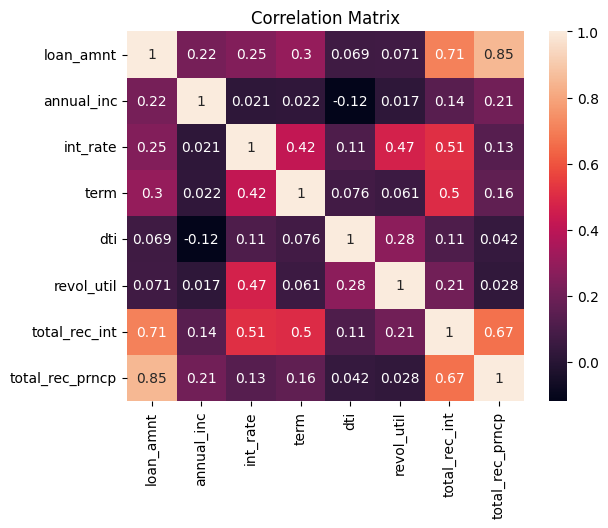

In [137]:

corr = loan_df1[['loan_amnt','annual_inc','int_rate','term','dti','revol_util','total_rec_int','total_rec_prncp']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

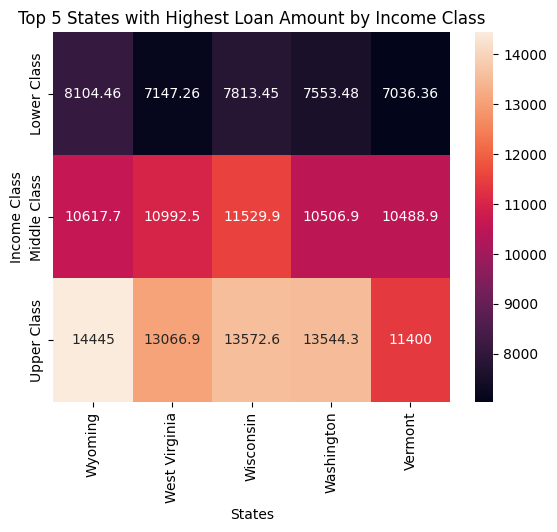

In [138]:

p= pd.pivot_table(data=loan_df1,columns='addr_state',index='income_class', values='loan_amnt').sort_values('addr_state',ascending=False, axis=1).iloc[:,:5]
sns.heatmap(p,annot=True,fmt='g')
labels = ['Wyoming', 'West Virginia', 'Wisconsin','Washington','Vermont']
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5],labels,rotation=90)
plt.title('Top 5 States with Highest Loan Amount by Income Class')
plt.xlabel('States')
plt.ylabel('Income Class')
plt.show()

<Figure size 600x1200 with 0 Axes>

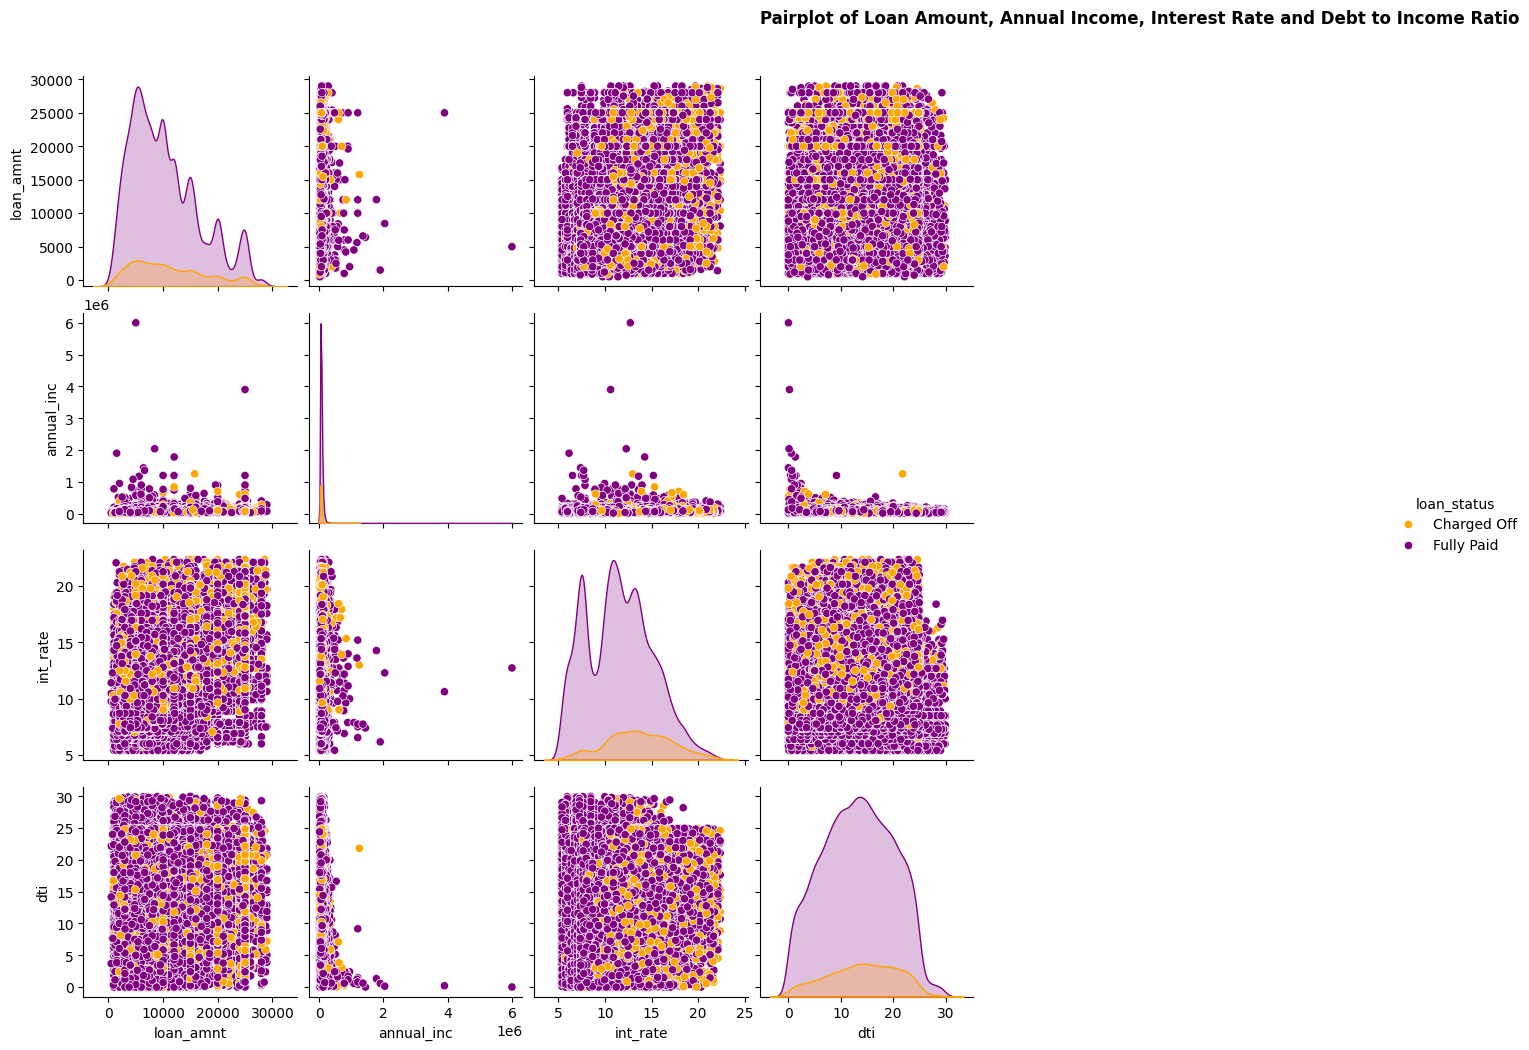

In [139]:

plt.figure(figsize=(6,12))
sns.pairplot(loan_df1[['loan_amnt', 'annual_inc', 'int_rate', 'dti','loan_status']], hue='loan_status')
plt.title('Pairplot of Loan Amount, Annual Income, Interest Rate and Debt to Income Ratio', y=4.6,loc = 'left', fontweight='bold')
plt.show()

### Conclusion from Multivariate Analysis

1. **Total Loan Amount by Months**:
    - The total loan amount varies significantly across different months.
    - There is a noticeable trend in the distribution of loan amounts over the months.

2. **Total Loan Amount by Years**:
    - Both "Fully Paid" and "Charged Off" loan amounts have increased over the years.
    - The heatmap shows a clear trend of increasing loan amounts with respect to the issue date years.

3. **Loan Amount and Interest Rate by Loan Status**:
    - Defaulters tend to have higher loan amounts and higher interest rates.
    - Non-defaulters have lower loan amounts and lower interest rates.

4. **Top 5 States with Highest Loan Amount**:
    - California (CA) has the highest total loan amount and the highest default total amount.
    - New York (NY) follows with the second highest total loan amount and default total amount.
    - Texas (TX) has the third highest total loan amount but the lowest default total amount among the top 5 states.

5. **Average Loan Amount by Grade and Loan Status**:
    - Higher risk grades (E and F) show the highest loan amounts for "Charged Off" loans, indicating riskier applicants.
    - Moderate risk grades (B, C, and D) have balanced "Charged Off" amounts.
    - Lower risk grade (A) has the lowest "Charged Off" amount, indicating less risky applicants.

6. **Loan Amount by Employment Length and Loan Status**:
    - Despite stable employment lengths, there are some loan defaulters with high loan amounts (e.g., 10+ and 9 years).
    - Applicants with unstable employment lengths and low loan amounts are riskier loan applicants.

7. **Loan Amount by Purpose and Loan Status**:
    - The purpose of the loan significantly affects the loan amount and loan status.
    - Certain purposes, such as debt consolidation, have higher total loan amounts and higher default rates.



# Geographic Analysis of Loan Defaulters

In [140]:

import plotly.express as px
df = loan_df1[loan_df1['loan_status'] == "Charged Off"]
total_sum_by_state = df.groupby('addr_state')['loan_amnt'].sum()
fig = px.choropleth(total_sum_by_state, locationmode='USA-states', locations=total_sum_by_state.index, color='loan_amnt',scope='usa', title='Toal Default Loan Amount by State')
fig.show()

# Summary for Identifying Risky Applicants

1. **Loan Status and Interest Rates**:
    - Defaulters tend to have higher interest rates compared to non-defaulters.
    - High interest rates are more likely to result in loan defaults.

2. **Loan Amount and Loan Status**:
    - Higher loan amounts are associated with higher risk of default.
    - Applicants with higher loan amounts should be scrutinized more closely.

3. **Employment Length and Loan Status**:
    - Applicants with unstable employment lengths and low loan amounts are riskier.
    - Despite stable employment lengths, some applicants with high loan amounts still default.

4. **Home Ownership and Loan Status**:
    - Applicants with rented homes have a higher risk of default compared to those with mortgage or owned homes.

5. **Purpose of Loan and Loan Status**:
    - Certain loan purposes, such as debt consolidation, have higher total loan amounts and higher default rates.
    - Applicants applying for loans for high-risk purposes should be evaluated carefully.

6. **Income Class and Loan Status**:
    - Upper-class applicants have the highest average default loan amounts.
    - Lower-class applicants have the lowest average default loan amounts.

7. **Geographical Analysis**:
    - States like California (CA) and New York (NY) have the highest total loan amounts and highest default amounts.
    - Applicants from these states should be assessed with additional caution.

8. **Grade and Loan Status**:
    - Loans graded `F` have the highest interest rates and are more likely to default.
    - Loans graded `A` have the lowest interest rates and are less likely to default.
    - Interest rates gradually increase from `Grade A` to `Grade G`.

9. **Loan Term and Loan Status**:
    - Long-term loans (60 months) have higher default rates due to higher risk.
    - Short-term loans (36 months) have lower default rates due to lower risk.


### Recommendations:
- Pay closer attention to applicants with unstable employment lengths and those applying for high-risk loan purposes.
- Consider geographical factors and loan grades when assessing the risk of applicants.

# Thank You 
